# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='~/../images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='~/../images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
df = pd.read_csv('zillow_data.csv')
df.head()

RegionID  RegionName      City State              Metro CountyName  \
0     84654       60657   Chicago    IL            Chicago       Cook   
1     90668       75070  McKinney    TX  Dallas-Fort Worth     Collin   
2     91982       77494      Katy    TX            Houston     Harris   
3     84616       60614   Chicago    IL            Chicago       Cook   
4     93144       79936   El Paso    TX            El Paso    El Paso   

   SizeRank   1996-04   1996-05   1996-06  ...  2017-07  2017-08  2017-09  \
0         1  334200.0  335400.0  336500.0  ...  1005500  1007500  1007800   
1         2  235700.0  236900.0  236700.0  ...   308000   310000   312500   
2         3  210400.0  212200.0  212200.0  ...   321000   320600   320200   
3         4  498100.0  500900.0  503100.0  ...  1289800  1287700  1287400   
4         5   77300.0   77300.0   77300.0  ...   119100   119400   120000   

   2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
0  1009600  1013300  1018700  1024400  1030700  1033800  1030600  
1   314100   315000   316600   318100   319600   321100   321800  
2   320400   320800   321200   321200   323000   326900   329900  
3  1291500  1296600  1299000  1302700  1306400  1308500  1307000  
4   120300   120300   120300   120300   120500   121000   121500  

[5 rows x 272 columns]

In [2]:
len(df)

14723

In [3]:
df['State'].value_counts()

CA    1224
NY    1015
TX     989
PA     831
FL     785
OH     588
IL     547
NJ     502
MI     499
IN     428
NC     428
MA     417
TN     404
VA     401
MN     375
GA     345
WA     341
WI     332
MO     319
MD     317
CO     249
KS     241
AZ     230
OR     224
OK     221
SC     206
NH     199
LA     193
AL     183
IA     158
MS     153
KY     139
CT     124
UT     121
ID     110
AR     105
NV     103
ME      86
NE      83
WV      72
MT      71
HI      62
NM      60
RI      59
DE      41
WY      31
ND      31
AK      28
SD      19
DC      18
VT      16
Name: State, dtype: int64

In [4]:
df_texas = df[df['State']=='TX']
df_texas

RegionID  RegionName           City State              Metro  \
1         90668       75070       McKinney    TX  Dallas-Fort Worth   
2         91982       77494           Katy    TX            Houston   
4         93144       79936        El Paso    TX            El Paso   
5         91733       77084        Houston    TX            Houston   
8         91940       77449           Katy    TX            Houston   
...         ...         ...            ...   ...                ...   
14372     91640       76941        Mertzon    TX         San Angelo   
14472     92897       79313          Anton    TX          Levelland   
14492     92921       79355         Plains    TX                NaN   
14599     92929       79366  Ransom Canyon    TX            Lubbock   
14695     91948       77457      Matagorda    TX           Bay City   

      CountyName  SizeRank   1996-04   1996-05   1996-06  ...  2017-07  \
1         Collin         2  235700.0  236900.0  236700.0  ...   308000   
2         Harris         3  210400.0  212200.0  212200.0  ...   321000   
4        El Paso         5   77300.0   77300.0   77300.0  ...   119100   
5         Harris         6   95000.0   95200.0   95400.0  ...   157900   
8         Harris         9   95400.0   95600.0   95800.0  ...   166800   
...          ...       ...       ...       ...       ...  ...      ...   
14372      Irion     14373       NaN       NaN       NaN  ...   122500   
14472    Hockley     14473       NaN       NaN       NaN  ...    55400   
14492     Yoakum     14493       NaN       NaN       NaN  ...   100500   
14599    Lubbock     14600  134500.0  134500.0  134400.0  ...   252100   
14695  Matagorda     14696   90700.0   91000.0   91200.0  ...   250400   

       2017-08  2017-09  2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  \
1       310000   312500   314100   315000   316600   318100   319600   321100   
2       320600   320200   320400   320800   321200   321200   323000   326900   
4       119400   120000   120300   120300   120300   120300   120500   121000   
5       158700   160200   161900   162800   162800   162800   162900   163500   
8       167400   168400   169600   170900   172300   173300   174200   175400   
...        ...      ...      ...      ...      ...      ...      ...      ...   
14372   121800   121600   122200   123500   124700   124300   122600   121600   
14472    56300    55700    56300    58900    61500    63000    63600    63500   
14492   100500   101000   100700    99700    97700    95800    94600    94000   
14599   251600   251600   251500   251300   251500   251700   252500   255000   
14695   253300   256900   256100   250700   243200   238300   234200   230500   

       2018-04  
1       321800  
2       329900  
4       121500  
5       164300  
8       176200  
...        ...  
14372   121600  
14472    63300  
14492    93500  
14599   257500  
14695   227300  

[989 rows x 272 columns]

In [5]:
print('number of counties: ' + str(len(df_texas['CountyName'].unique())))
df_texas_counties = df_texas['CountyName'].unique()
df_texas_counties_num_zips = df_texas['CountyName'].value_counts()
df_texas_counties_num_zips

number of counties: 174


Harris      121
Dallas       70
Tarrant      59
Bexar        55
Travis       45
           ... 
Mitchell      1
Gray          1
Newton        1
Kleberg       1
Trinity       1
Name: CountyName, Length: 174, dtype: int64

In [6]:
print('number of metro areas: ' + str(len(df_texas['Metro'].unique())))
df_texas_metros = df_texas['Metro'].unique()
df_texas['Metro'].value_counts()

number of metro areas: 61


Dallas-Fort Worth    217
Houston              187
San Antonio           78
Austin                73
Corpus Christi        22
El Paso               21
Beaumont              21
Killeen               19
Waco                  16
Tyler                 15
Lubbock               15
Wichita Falls         12
Amarillo              11
College Station       11
McAllen               11
Longview              11
Abilene               11
Athens                11
Brownsville           10
Texarkana              7
Odessa                 6
Marshall               6
Victoria               5
San Angelo             5
Huntsville             4
Midland                4
Laredo                 4
El Campo               4
Nacogdoches            3
Brownwood              3
Port Lavaca            3
Bay City               3
Brenham                3
Palestine              3
Corsicana              3
Rio Grande City        2
Kerrville              2
Mineral Wells          2
Gainesville            2
Lufkin                 2


In [7]:
def prep_data(data_frame, to_drop_list):
    import pandas as pd
    data_frames = []
    zip_codes = []
    for i in range(0, len(data_frame)):
        one_data_frame = pd.DataFrame()
        one_data_frame['Price'] = data_frame.iloc[i,:]
        print(str(i+1) + ' of ' + str(len(data_frame)) + ' parsed')
        zip_code = one_data_frame.loc['RegionName']
        one_data_frame = one_data_frame.drop(to_drop_list)
        one_data_frame.index = pd.to_datetime(one_data_frame.index)
        one_data_frame.plot(title=int(zip_code))
        data_frames.append(one_data_frame)
        zip_codes.append(zip_code)
    return data_frames, zip_codes

1 of 2 parsed
2 of 2 parsed


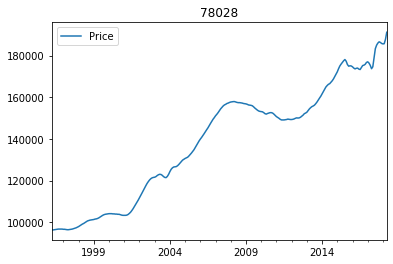

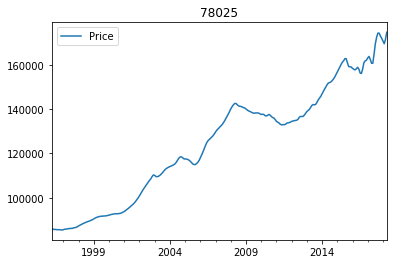

In [8]:
to_drop = ['RegionID', 'City', 'State', 'RegionName', 'Metro', 'CountyName', 'SizeRank']
kerr_data, kerr_zip_codes = prep_data(df_texas[df_texas['CountyName']=='Kerr'], to_drop)

In [9]:
kerr_zip_codes[1][0]

78025

In [12]:
len(kerr_data[0])

265

1 of 121 parsed
2 of 121 parsed
3 of 121 parsed
4 of 121 parsed
5 of 121 parsed
6 of 121 parsed
7 of 121 parsed
8 of 121 parsed
9 of 121 parsed
10 of 121 parsed
11 of 121 parsed
12 of 121 parsed
13 of 121 parsed
14 of 121 parsed
15 of 121 parsed
16 of 121 parsed
17 of 121 parsed
18 of 121 parsed
19 of 121 parsed
20 of 121 parsed
21 of 121 parsed
22 of 121 parsed
23 of 121 parsed
24 of 121 parsed
25 of 121 parsed


C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


26 of 121 parsed
27 of 121 parsed
28 of 121 parsed
29 of 121 parsed
30 of 121 parsed
31 of 121 parsed
32 of 121 parsed
33 of 121 parsed
34 of 121 parsed
35 of 121 parsed
36 of 121 parsed
37 of 121 parsed
38 of 121 parsed
39 of 121 parsed
40 of 121 parsed
41 of 121 parsed
42 of 121 parsed
43 of 121 parsed
44 of 121 parsed
45 of 121 parsed
46 of 121 parsed
47 of 121 parsed
48 of 121 parsed
49 of 121 parsed
50 of 121 parsed
51 of 121 parsed
52 of 121 parsed
53 of 121 parsed
54 of 121 parsed
55 of 121 parsed
56 of 121 parsed
57 of 121 parsed
58 of 121 parsed
59 of 121 parsed
60 of 121 parsed
61 of 121 parsed
62 of 121 parsed
63 of 121 parsed
64 of 121 parsed
65 of 121 parsed
66 of 121 parsed
67 of 121 parsed
68 of 121 parsed
69 of 121 parsed
70 of 121 parsed
71 of 121 parsed
72 of 121 parsed
73 of 121 parsed
74 of 121 parsed
75 of 121 parsed
76 of 121 parsed
77 of 121 parsed
78 of 121 parsed
79 of 121 parsed
80 of 121 parsed
81 of 121 parsed
82 of 121 parsed
83 of 121 parsed
84 of 121 pars

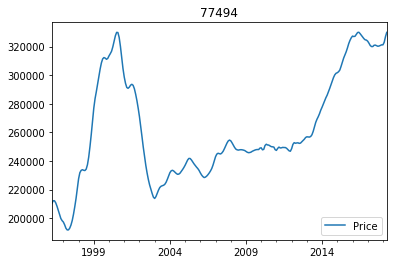

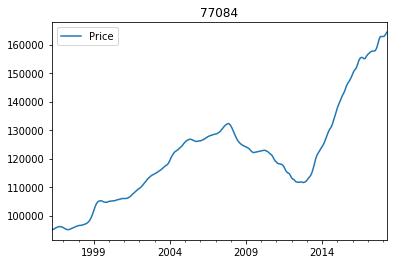

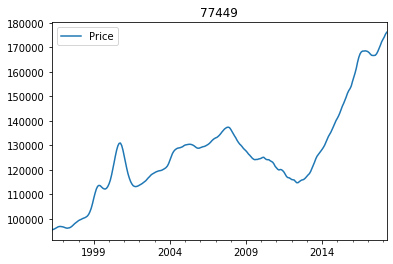

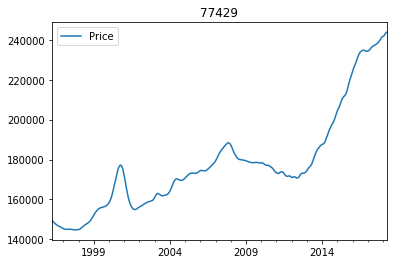

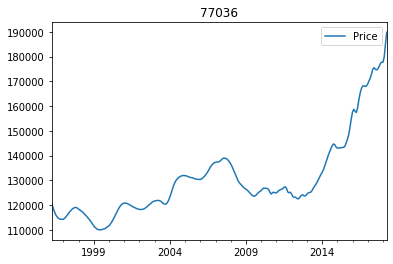

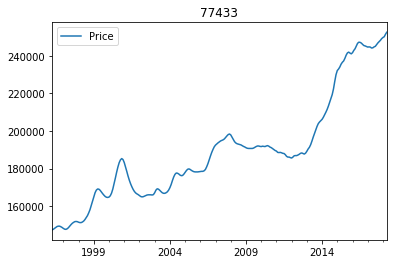

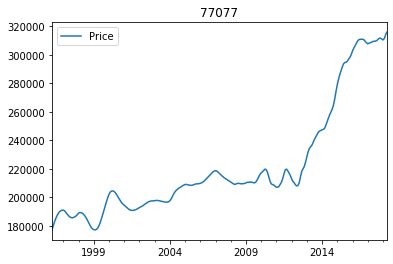

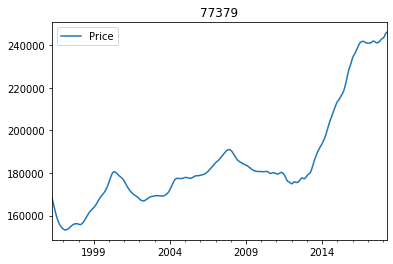

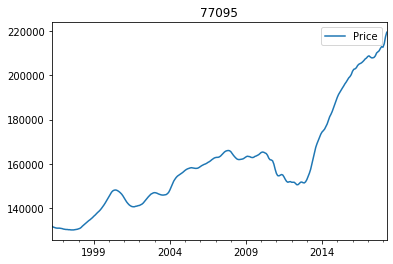

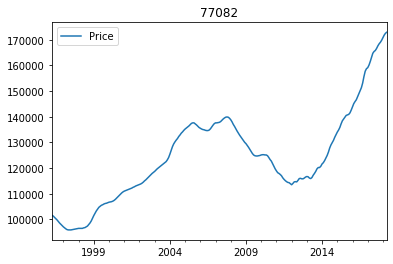

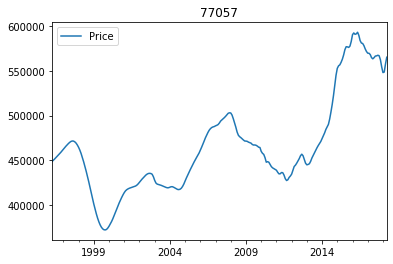

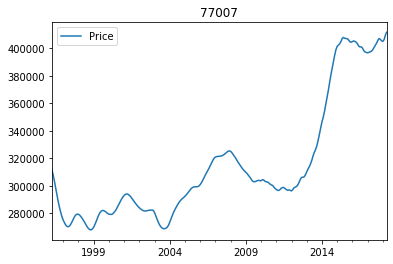

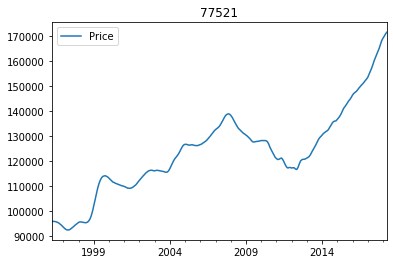

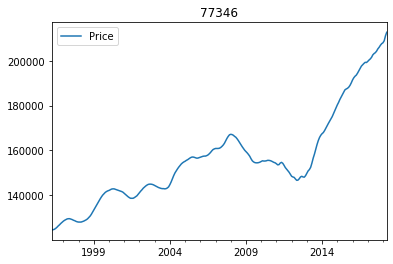

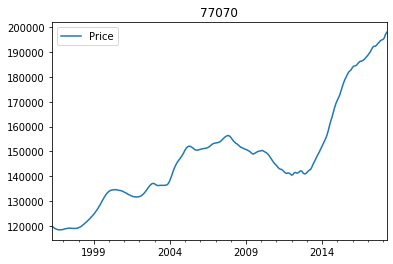

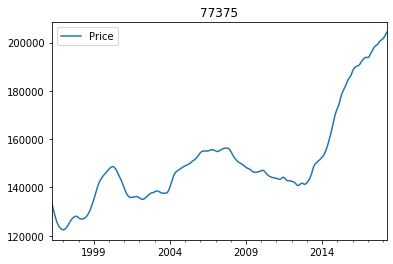

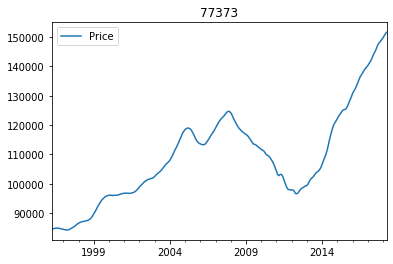

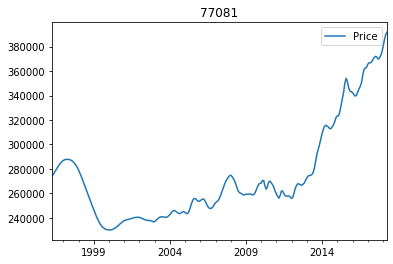

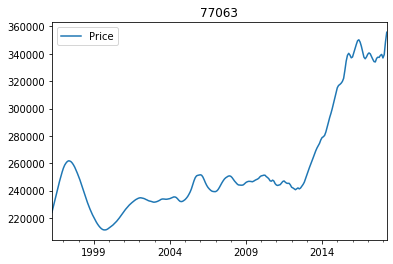

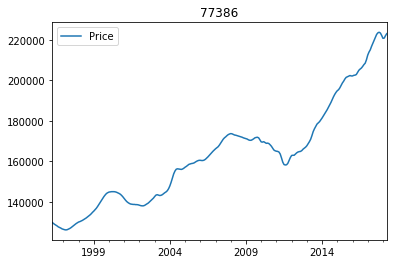

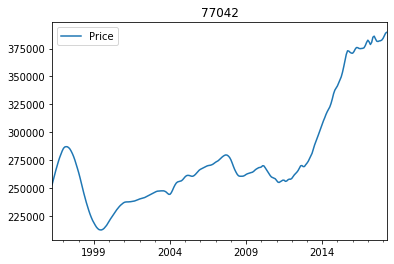

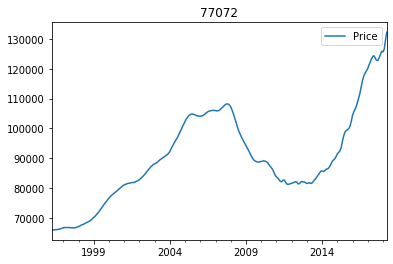

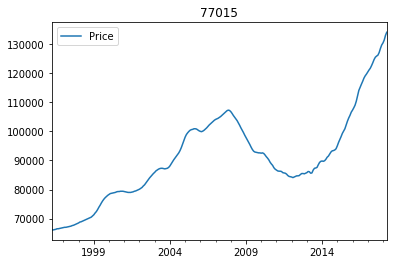

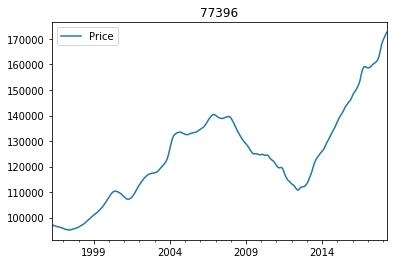

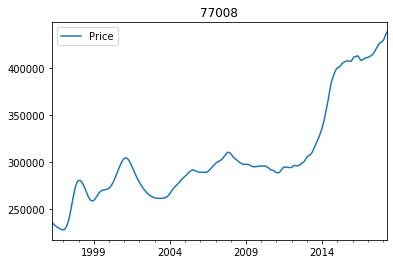

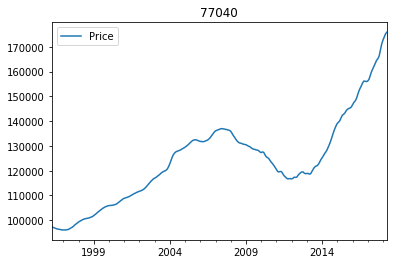

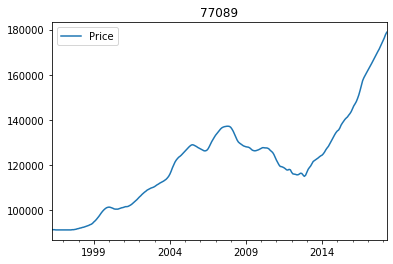

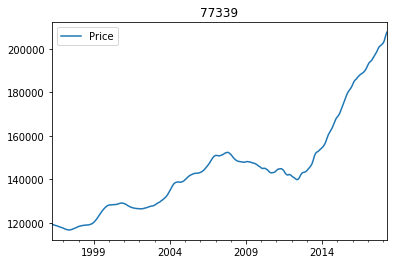

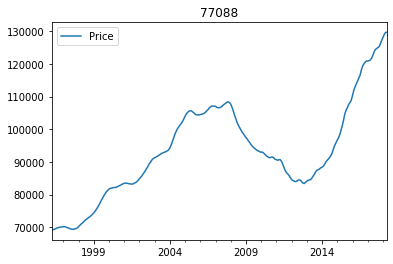

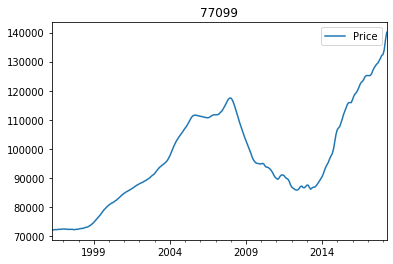

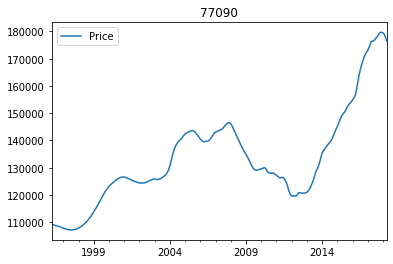

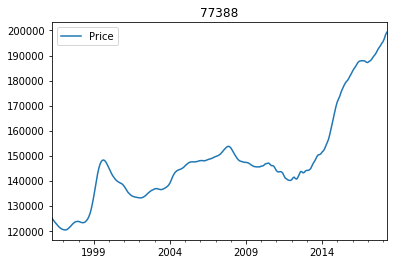

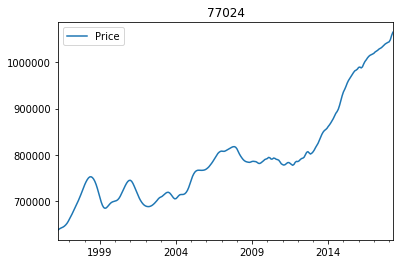

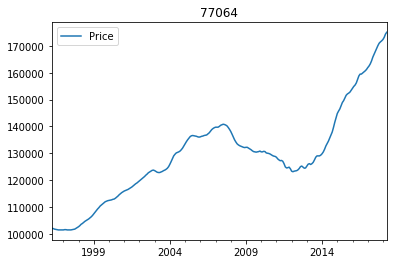

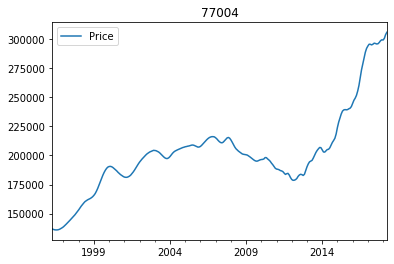

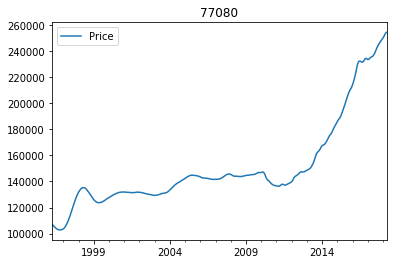

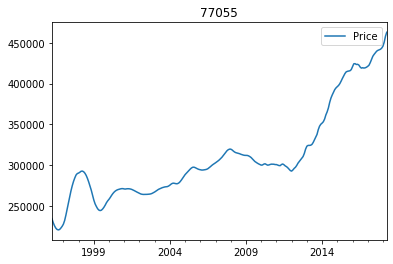

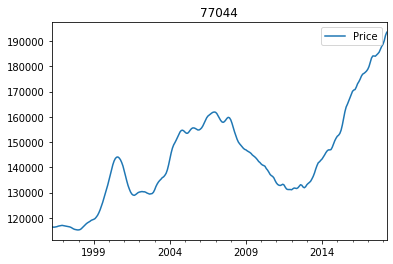

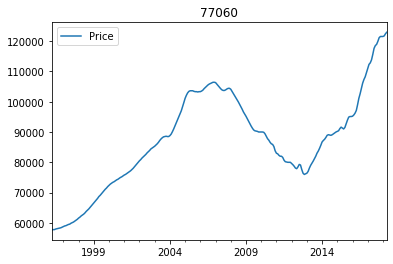

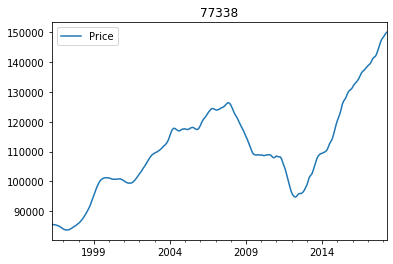

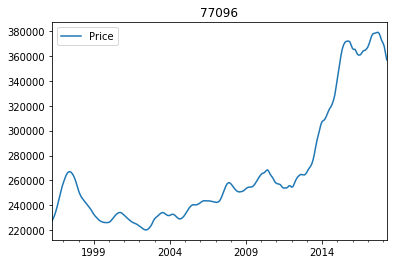

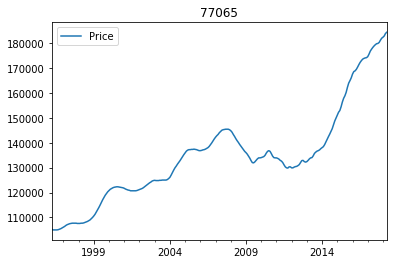

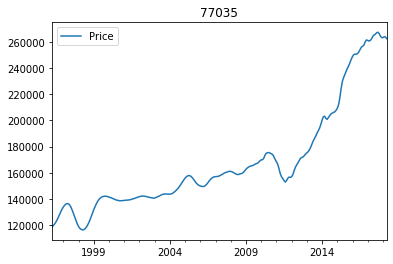

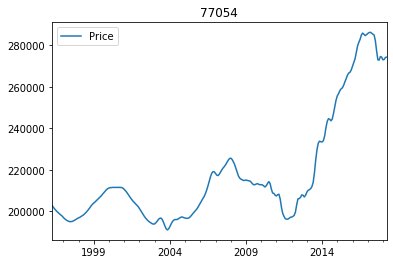

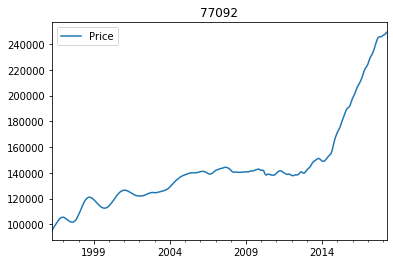

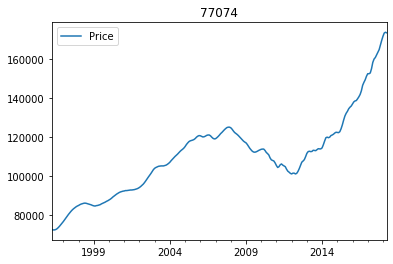

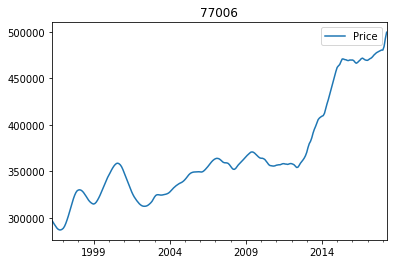

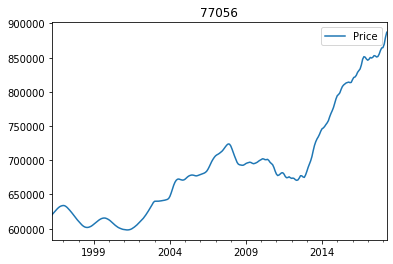

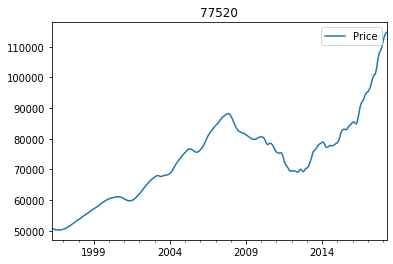

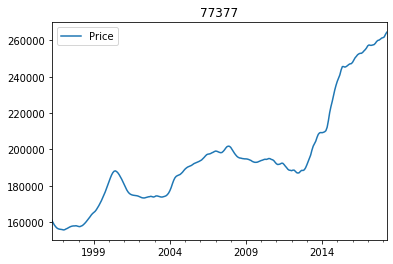

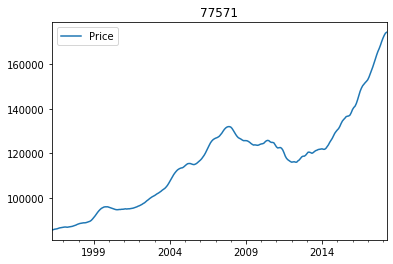

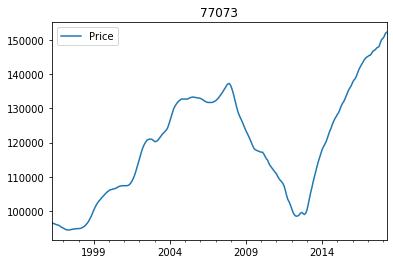

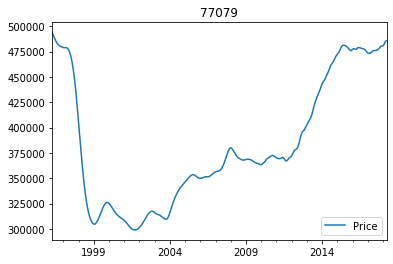

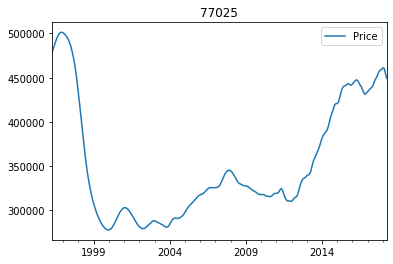

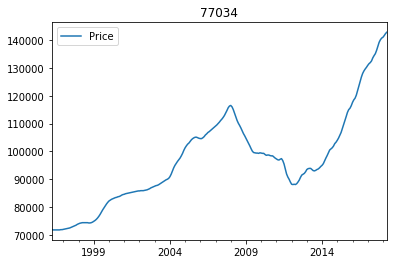

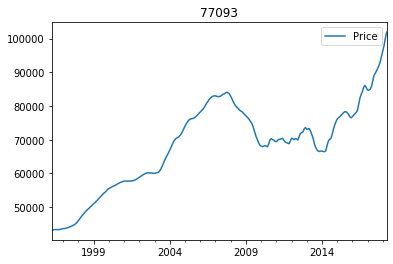

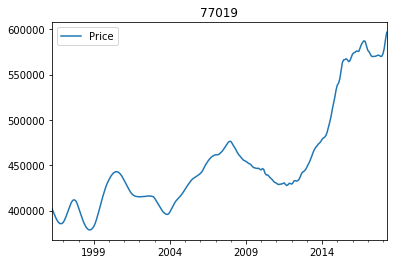

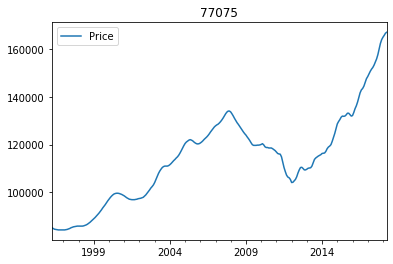

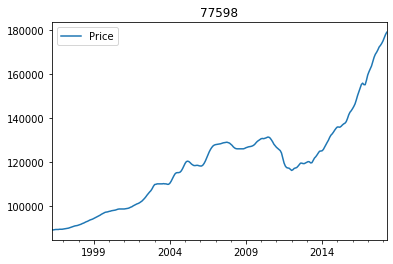

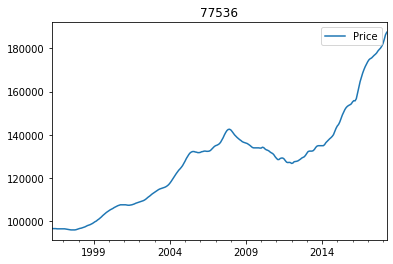

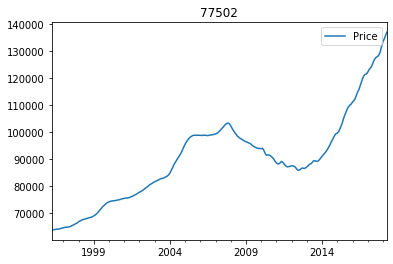

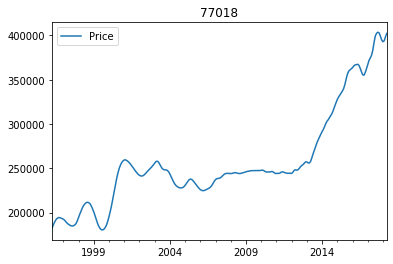

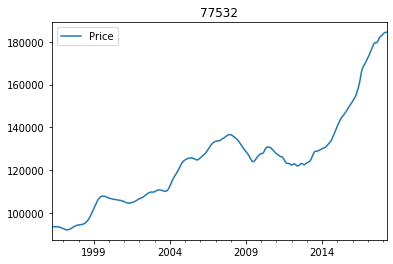

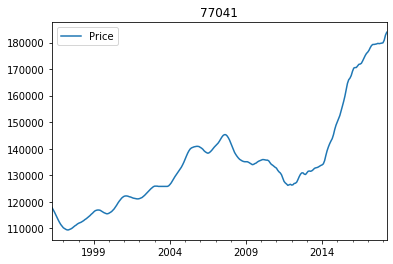

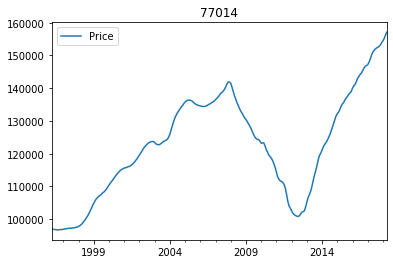

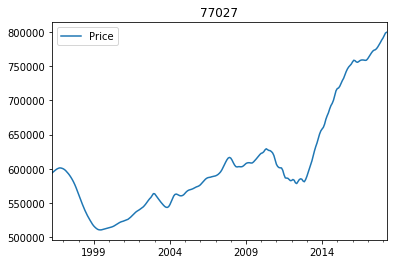

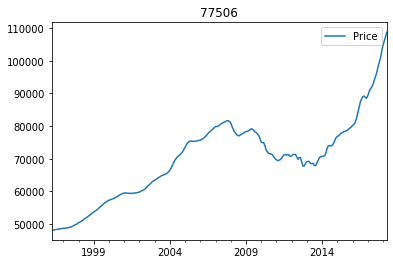

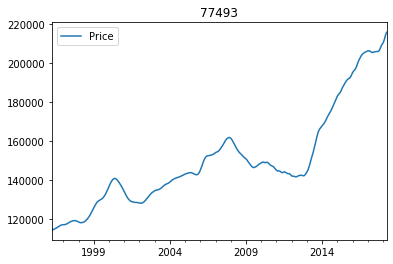

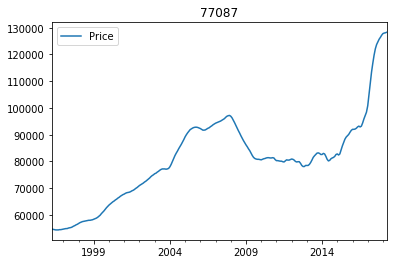

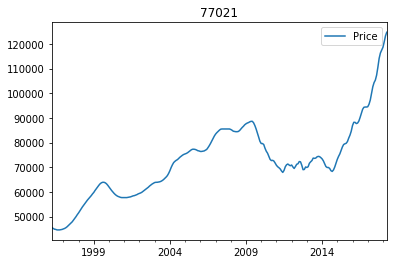

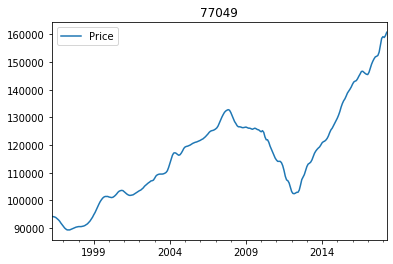

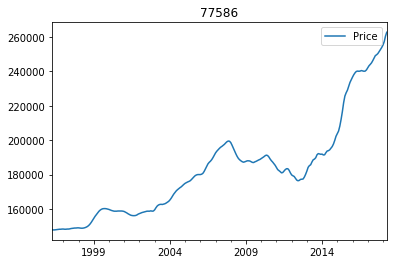

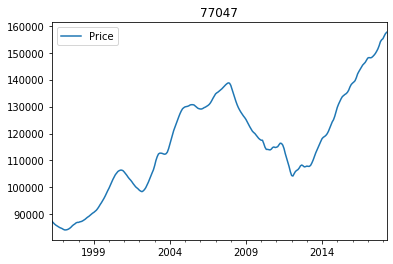

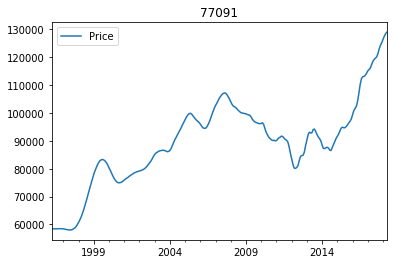

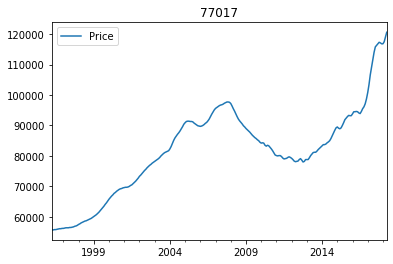

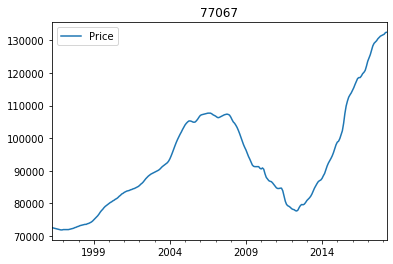

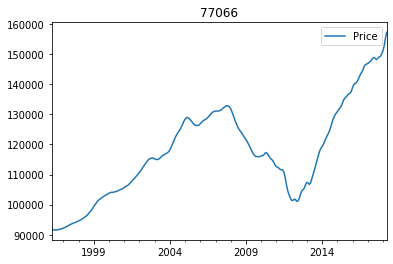

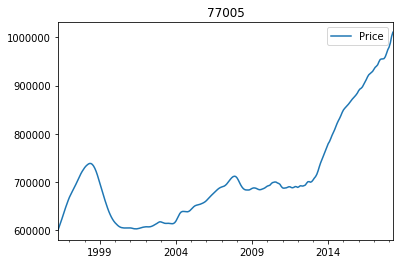

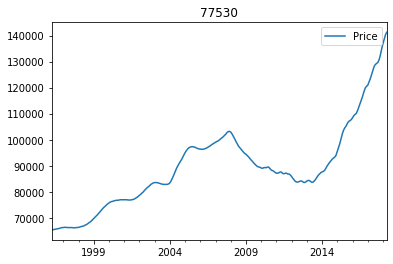

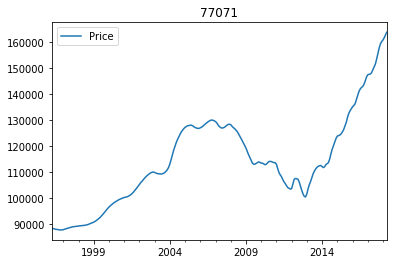

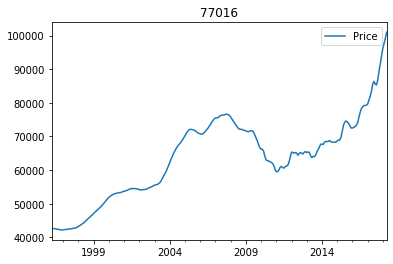

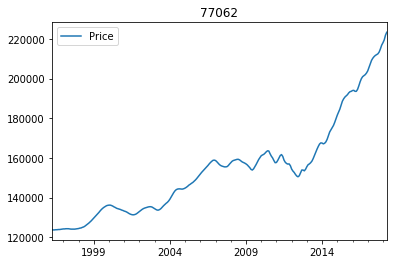

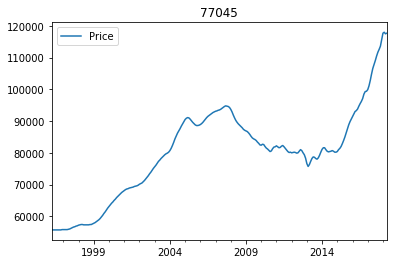

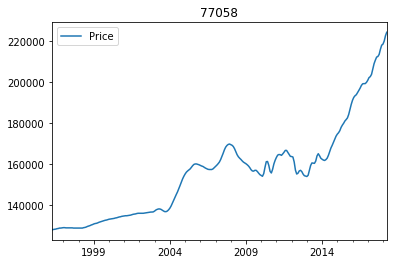

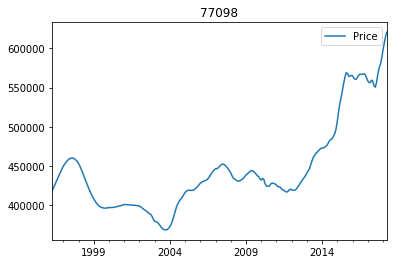

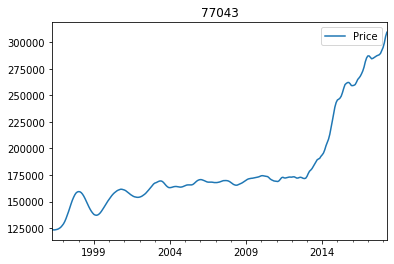

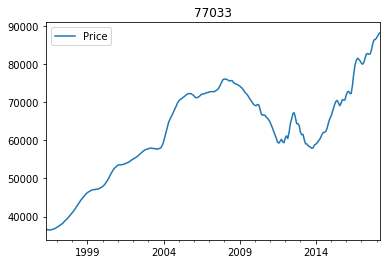

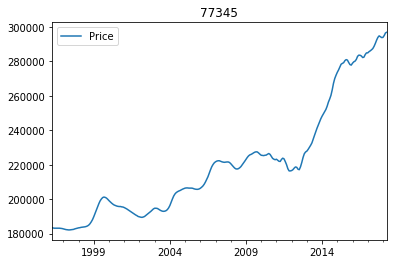

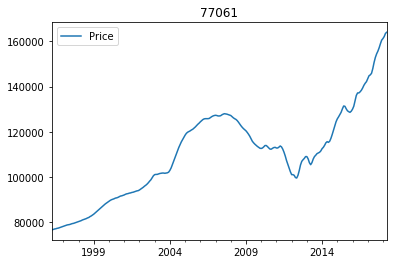

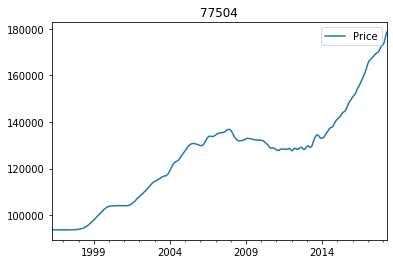

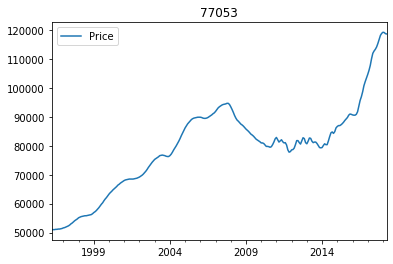

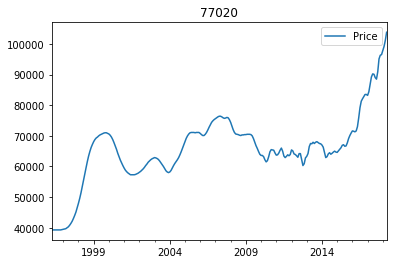

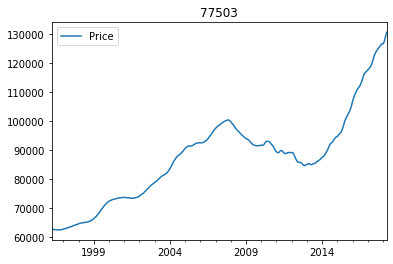

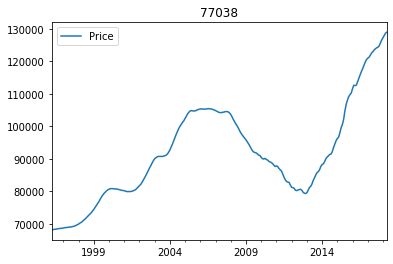

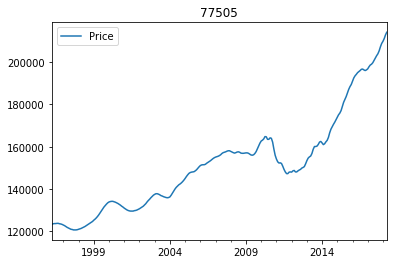

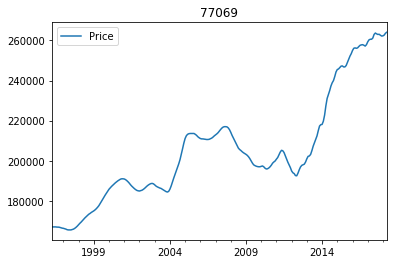

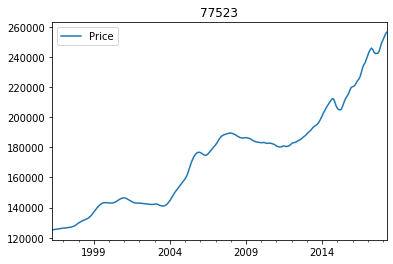

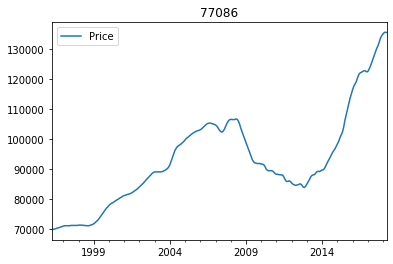

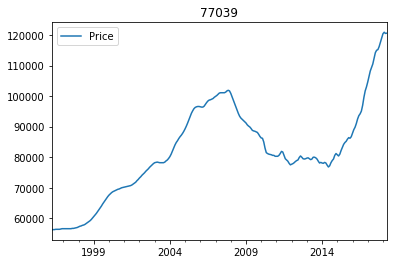

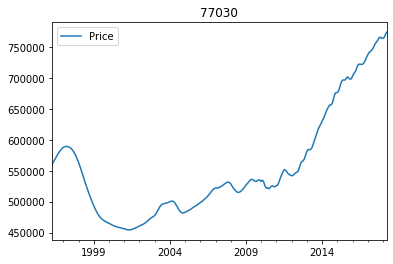

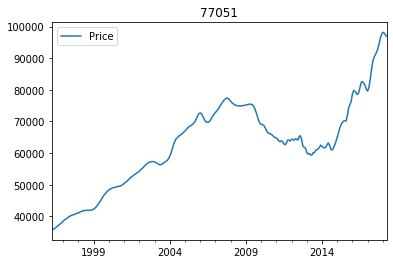

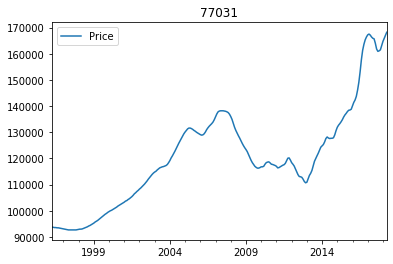

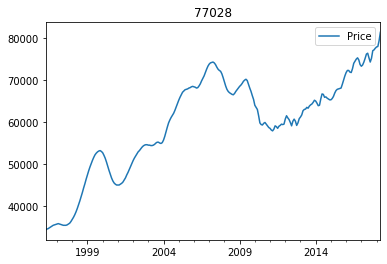

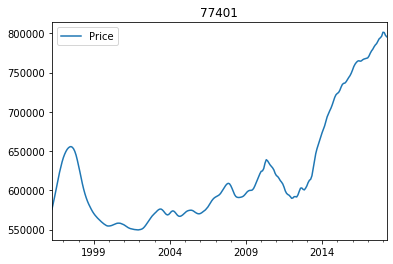

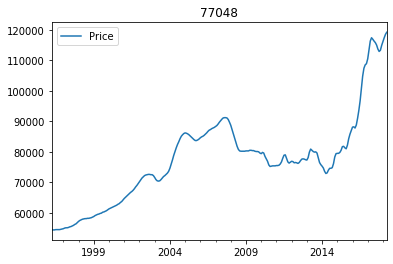

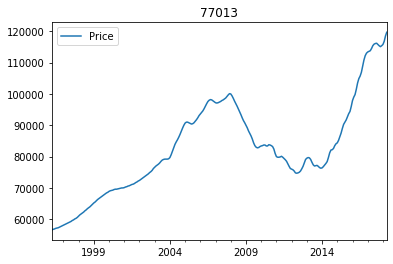

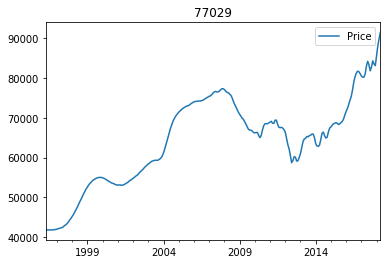

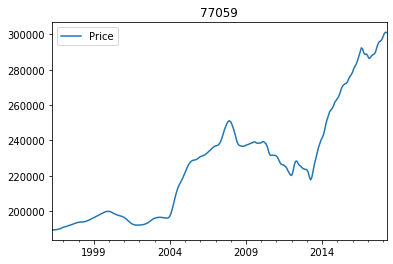

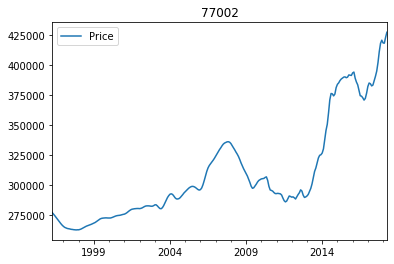

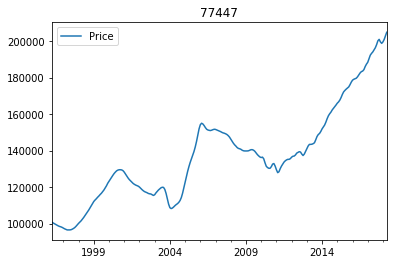

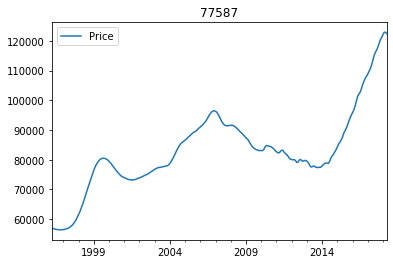

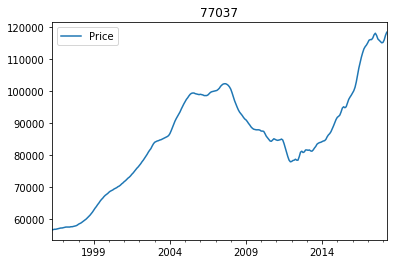

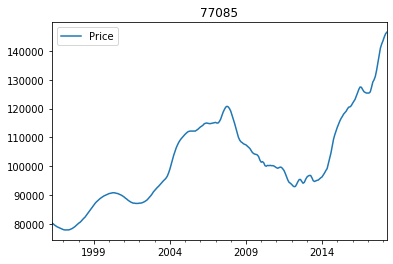

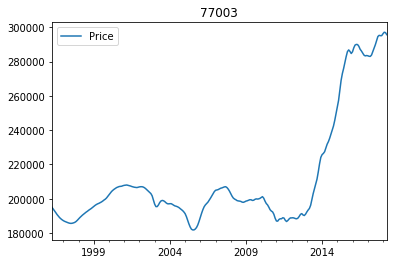

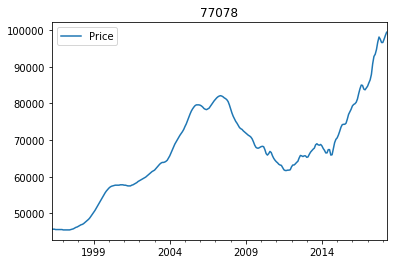

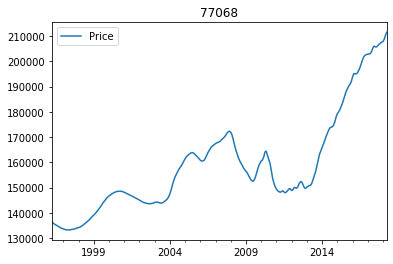

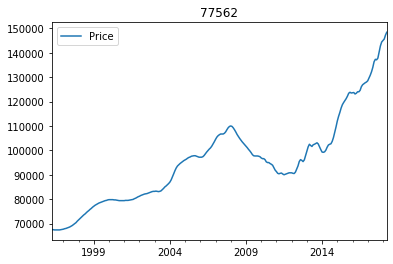

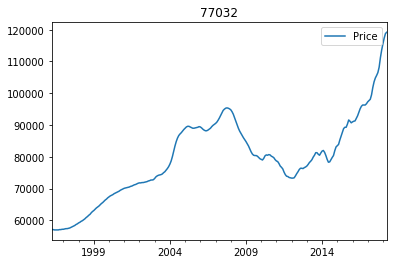

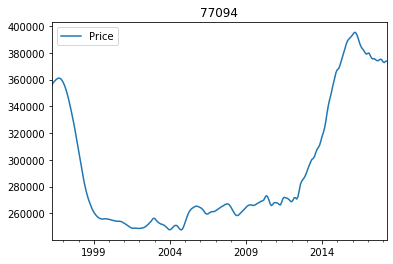

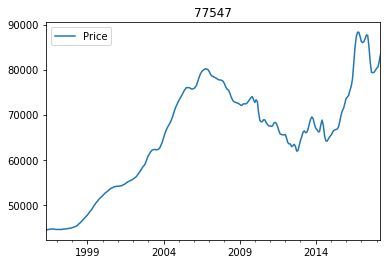

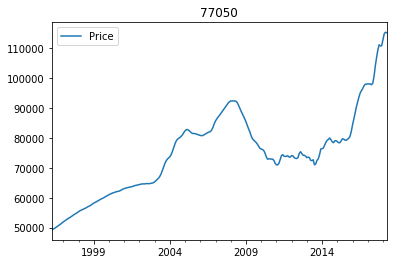

In [13]:
harris_data, harris_zip_codes = prep_data(df_texas[df_texas['CountyName']=='Harris'], to_drop)

In [14]:
kendall_county_boerne = df_texas[df_texas['City']=='Boerne']
kendall_county_comfort = df_texas[df_texas['City']=='Comfort']
kendall_county_boerne = kendall_county_boerne.drop(['RegionID', 'City', 'State', 'RegionName', 'Metro', 'CountyName', 'SizeRank'],axis=1)
kendall_county_comfort = kendall_county_comfort.drop(['RegionID', 'City', 'State', 'RegionName', 'Metro', 'CountyName', 'SizeRank'],axis=1)
kendall_county_boerne = kendall_county_boerne.melt()
kendall_county_comfort = kendall_county_comfort.melt()
kendall_county_boerne['variable'] = pd.to_datetime(kendall_county_boerne['variable'])
kendall_county_comfort['variable'] = pd.to_datetime(kendall_county_comfort['variable'])
kendall_county_boerne.index = kendall_county_boerne['variable']
kendall_county_comfort.index = kendall_county_comfort['variable']
kendall_county_boerne = kendall_county_boerne.drop(labels=('variable'), axis=1)
kendall_county_comfort = kendall_county_comfort.drop(labels=('variable'), axis=1)
print(kendall_county_boerne.head())
print(kendall_county_comfort.head())

               value
variable            
1996-04-01  196600.0
1996-05-01  196400.0
1996-06-01  196200.0
1996-07-01  196100.0
1996-08-01  195900.0
               value
variable            
1996-04-01  106600.0
1996-05-01  106400.0
1996-06-01  106300.0
1996-07-01  106200.0
1996-08-01  106100.0


In [15]:
print("boerne n/a's :" + str(kendall_county_boerne.isna().sum()))
print("comfort n/a's :" + str(kendall_county_comfort.isna().sum()))

boerne n/a's :value    0
dtype: int64
comfort n/a's :value    0
dtype: int64


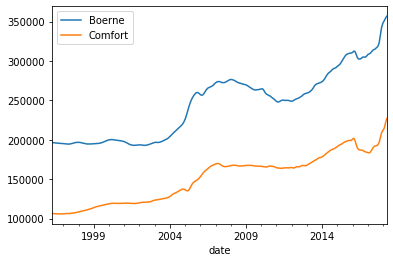

In [16]:
kendall_county_df = pd.DataFrame()
kendall_county_df['date'] = kendall_county_boerne.index
kendall_county_df.index = kendall_county_df['date']
kendall_county_df = kendall_county_df.drop(labels='date', axis=1)
kendall_county_df['Boerne'] = kendall_county_boerne['value']
kendall_county_df['Comfort'] = kendall_county_comfort['value']
kendall_county_df.plot();

ARIMA modeling to account for trend (need to make stationary if going to use ARMA)

In [17]:
def base_model(data):
    import numpy as np
    from statsmodels.tsa.arima_model import ARIMA
    n = len(data)
    base_arima = ARIMA(np.asarray(data), order=(0,1,0)).fit()
    forcast = base_arima.forecast()[0]
    base_arima_aic = base_arima.aic
    base_arima_bic = base_arima.bic
    base_arima_coeff = base_arima.params
    base_arima_pvalues = base_arima.pvalues
#     base_arima_frequncies = print(base_arima.summary().tables[0][1][1])
    base_arima_residuals = base_arima.resid
    base_arima_summary = base_arima.summary()
    return base_arima_coeff, base_arima_pvalues, base_arima_aic, base_arima_bic, base_arima_residuals, base_arima_summary

In [20]:
base_models = []
for i in kerr_data:
    base_models.append(base_model(i))
base_models

[(array([359.46969697]),
  array([2.8729615e-16]),
  4187.896289995977,
  4195.04818820227,
  array([-359.46969696969694, -259.46969696969694, -259.46969696969694,
         -259.46969696969694, -259.46969696969694, -359.46969696969694,
         -359.46969696969694, -359.46969696969694, -459.46969696969694,
         -359.46969696969694, -459.46969696969694, -459.46969696969694,
         -359.46969696969694, -259.46969696969694, -259.46969696969694,
         -259.46969696969694, -159.46969696969694, -159.46969696969694,
         -159.46969696969694, -59.46969696969694, -59.46969696969694,
         40.53030303030306, 40.53030303030306, 40.53030303030306,
         -59.46969696969694, 40.53030303030306, 40.53030303030306,
         40.53030303030306, -159.46969696969694, -159.46969696969694,
         -259.46969696969694, -259.46969696969694, -259.46969696969694,
         -159.46969696969694, -259.46969696969694, -159.46969696969694,
         -59.46969696969694, 40.53030303030306, 40.53030303

In [25]:
base_models = []
import time
for i in harris_data:
    base_models.append(base_model(i))
base_models
# print('Took', time.time()-start, 'seconds.')

[(array([452.65151515]),
  array([0.00540782]),
  4909.460365837797,
  4916.61226404409,
  array([1347.348484848485, -452.651515151515, -1952.651515151515,
         -2852.651515151515, -3252.651515151515, -3452.651515151515,
         -3152.651515151515, -1952.651515151515, -1452.651515151515,
         -2352.651515151515, -2852.651515151515, -1652.651515151515,
         -452.651515151515, 747.348484848485, 1747.348484848485,
         2747.348484848485, 3947.348484848485, 4747.348484848485,
         5347.348484848485, 6447.348484848485, 6347.348484848485,
         3847.348484848485, 1147.348484848485, 47.348484848484986,
         -852.651515151515, -652.651515151515, 547.348484848485,
         2647.348484848485, 4947.348484848485, 6947.348484848485,
         7947.348484848485, 8947.348484848484, 8547.348484848484,
         6147.348484848485, 4447.348484848485, 4947.348484848485,
         4847.348484848485, 4647.348484848485, 3847.348484848485,
         2347.348484848485, 447.348484848485

In [26]:
from statsmodels.tsa.arima_model import ARIMA
import time
start = time.time()
n = len(kendall_county_boerne)
arima_model = ARIMA(kendall_county_boerne, order=(0,1,0)).fit()
forecast = arima_model.forecast()[0]
arima_model.summary()
# print('Took', time.time()-start, 'seconds.')

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.value   No. Observations:                  264
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -2313.898
Method:                           css   S.D. of innovations           1549.716
Date:                Fri, 07 Feb 2020   AIC                           4631.796
Time:                        20:36:25   BIC                           4638.948
Sample:                    05-01-1996   HQIC                          4634.670
                         - 04-01-2018                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        606.8182     95.378      6.362      0.000     419.880     793.756
==============================================================================
"""

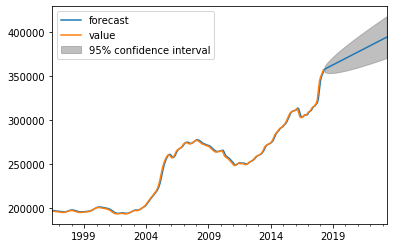

In [27]:
# start = time.time()
arima_model.plot_predict(2,n+60);
# print('Took', time.time()-start, 'seconds.')

In [28]:
def pyramid_best_model_output(data):
    from pyramid.arima import auto_arima
    import numpy as np
    arima_best_models = []
    forecast_best_models = []
    arima_best_model_summarys = []
    best_model_predictions = []
    plots = []
    output = pd.DataFrame()
    n = len(data)
    print(str(i+1) +  ' of pyramid arima')
    model = auto_arima(np.asarray(data), trace=True, error_action='ignore', suppress_warnings=True, seasonal=False, m=52)
    order = model.get_params()['order']
    print(str(i+1) +  ' of arima using best params')
    arima_best_model = ARIMA(np.asarray(data), order=(order)).fit()
    arima_best_models.append(arima_best_model)
    print(str(i+1) +  ' of forecasts')
    forecast_best_model = arima_best_model.forecast(steps=60)[0]
    forecast_best_models.append(forecast_best_model)
    print(str(i+1) +  ' of summaries')
    arima_best_model_summary = arima_best_model.summary()
    arima_best_model_summarys.append(arima_best_model_summary)
#     print(str(i+1) +  ' of model validation')
#     best_model_predictions = arima_best_model.predict()
#     print(str(i+1) +  ' of model verification')
#     plot = arima_best_model.plot_predict(2,n+60)
#     plots.append(plot)
    output['arima'] = arima_best_models
    output['forecast'] = forecast_best_models
    output['arima summary'] = arima_best_model_summarys
#     output['predicitons'] = best_model_predictions
#     output['forecast_plot'] = plots
#     model_fit = model.fit(data)
#     forecast = model.predict(n_periods=52)
    return output

In [32]:
kerr_best_models = []
for i in range(0, len(kerr_data)):
    print(str(i+1) +  ' of ' + str(len(kerr_data)))
    n = len(kerr_data[i])
    kerr_best_models.append(pyramid_best_model_output(np.asarray(kerr_data[i])))
kerr_best_models

1 of 2


C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\pyramid\__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginni

1 of pyramid arima
Fit ARIMA: order=(2, 1, 2); AIC=3796.509, BIC=3817.964, Fit time=0.185 seconds
Fit ARIMA: order=(0, 1, 0); AIC=4187.896, BIC=4195.048, Fit time=0.002 seconds
Fit ARIMA: order=(1, 1, 0); AIC=3934.922, BIC=3945.650, Fit time=0.053 seconds
Fit ARIMA: order=(0, 1, 1); AIC=3938.792, BIC=3949.520, Fit time=0.040 seconds
Fit ARIMA: order=(1, 1, 2); AIC=3796.665, BIC=3814.545, Fit time=0.102 seconds
Fit ARIMA: order=(3, 1, 2); AIC=3796.701, BIC=3821.733, Fit time=0.191 seconds
Fit ARIMA: order=(2, 1, 1); AIC=3813.537, BIC=3831.417, Fit time=0.097 seconds
Fit ARIMA: order=(2, 1, 3); AIC=3793.813, BIC=3818.844, Fit time=0.257 seconds
Fit ARIMA: order=(3, 1, 4); AIC=3792.382, BIC=3824.566, Fit time=0.572 seconds
Fit ARIMA: order=(2, 1, 4); AIC=3787.632, BIC=3816.240, Fit time=0.430 seconds
Fit ARIMA: order=(2, 1, 5); AIC=3788.648, BIC=3820.832, Fit time=0.548 seconds
Fit ARIMA: order=(1, 1, 3); AIC=3792.622, BIC=3814.078, Fit time=0.216 seconds
Fit ARIMA: order=(3, 1, 5); AIC=3

[                                               arima  \
 0  <statsmodels.tsa.arima_model.ARIMAResultsWrapp...   
 
                                             forecast  \
 0  [193710.58695422017, 194765.64999745073, 19543...   
 
                                        arima summary  
 0                               ARIMA Model Resul...  ,
                                                arima  \
 0  <statsmodels.tsa.arima_model.ARIMAResultsWrapp...   
 
                                             forecast  \
 0  [176214.92745880582, 176298.54616630918, 17665...   
 
                                        arima summary  
 0                               ARIMA Model Resul...  ]

In [ ]:
# def model_validation(data, n):
#     predictions = data.predict(start=(n-12))
#     return predictions

In [ ]:
# model_validation(best_models[0]['arima'][0], len(kerr[0]))

In [33]:
# kerr[0].tail(12)

In [34]:
harris_best_models = []
for i in range(0, len(harris_data)):
    print(str(i+1) +  ' of ' + str(len(harris_data)))
    harris_best_models.append(pyramid_best_model_output(harris_data[i]))
harris_best_models

1 of 121
1 of pyramid arima
Fit ARIMA: order=(2, 1, 2); AIC=4181.299, BIC=4202.754, Fit time=0.161 seconds
Fit ARIMA: order=(0, 1, 0); AIC=4909.460, BIC=4916.612, Fit time=0.001 seconds
Fit ARIMA: order=(1, 1, 0); AIC=4369.768, BIC=4380.495, Fit time=0.067 seconds
Fit ARIMA: order=(0, 1, 1); AIC=4597.103, BIC=4607.831, Fit time=0.044 seconds
Fit ARIMA: order=(1, 1, 2); AIC=4189.604, BIC=4207.483, Fit time=0.137 seconds
Fit ARIMA: order=(3, 1, 2); AIC=4183.256, BIC=4208.288, Fit time=0.288 seconds
Fit ARIMA: order=(2, 1, 1); AIC=4202.405, BIC=4220.285, Fit time=0.153 seconds
Fit ARIMA: order=(2, 1, 3); AIC=4183.284, BIC=4208.315, Fit time=0.261 seconds
Fit ARIMA: order=(1, 1, 1); AIC=4224.470, BIC=4238.774, Fit time=0.095 seconds
Fit ARIMA: order=(3, 1, 3); AIC=4184.040, BIC=4212.647, Fit time=0.354 seconds
Total fit time: 1.564 seconds
1 of arima using best params
1 of forecasts
1 of summaries
2 of 121
2 of pyramid arima
Fit ARIMA: order=(2, 2, 2); AIC=nan, BIC=nan, Fit time=nan second

Fit ARIMA: order=(2, 2, 3); AIC=3707.188, BIC=3732.193, Fit time=0.305 seconds
Fit ARIMA: order=(3, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 3); AIC=3715.117, BIC=3736.550, Fit time=0.136 seconds
Fit ARIMA: order=(3, 2, 3); AIC=3699.765, BIC=3728.342, Fit time=0.238 seconds
Fit ARIMA: order=(4, 2, 4); AIC=3703.324, BIC=3739.046, Fit time=0.459 seconds
Fit ARIMA: order=(4, 2, 3); AIC=3696.471, BIC=3728.620, Fit time=0.500 seconds
Fit ARIMA: order=(4, 2, 2); AIC=3695.140, BIC=3723.717, Fit time=0.411 seconds
Fit ARIMA: order=(3, 2, 1); AIC=3730.275, BIC=3751.708, Fit time=0.107 seconds
Fit ARIMA: order=(5, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(5, 2, 2); AIC=3696.782, BIC=3728.931, Fit time=0.500 seconds
Fit ARIMA: order=(4, 2, 1); AIC=3725.162, BIC=3750.167, Fit time=0.142 seconds
Total fit time: 3.882 seconds
9 of arima using best params
9 of forecasts
9 of summaries
10 of 121
10 of pyramid arima
Fit ARIMA: order=(2, 2, 2); AIC=3583

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


10 of forecasts
10 of summaries
11 of 121
11 of pyramid arima
Fit ARIMA: order=(2, 1, 2); AIC=4481.037, BIC=4502.493, Fit time=0.218 seconds
Fit ARIMA: order=(0, 1, 0); AIC=4995.866, BIC=5003.018, Fit time=0.002 seconds
Fit ARIMA: order=(1, 1, 0); AIC=4604.113, BIC=4614.841, Fit time=0.039 seconds
Fit ARIMA: order=(0, 1, 1); AIC=4728.633, BIC=4739.361, Fit time=0.053 seconds
Fit ARIMA: order=(1, 1, 2); AIC=4515.553, BIC=4533.432, Fit time=0.055 seconds
Fit ARIMA: order=(3, 1, 2); AIC=4475.214, BIC=4500.246, Fit time=0.318 seconds
Fit ARIMA: order=(3, 1, 1); AIC=4512.726, BIC=4534.182, Fit time=0.136 seconds
Fit ARIMA: order=(3, 1, 3); AIC=4472.028, BIC=4500.636, Fit time=0.219 seconds
Fit ARIMA: order=(4, 1, 4); AIC=4463.132, BIC=4498.891, Fit time=0.749 seconds
Fit ARIMA: order=(3, 1, 4); AIC=4469.649, BIC=4501.832, Fit time=0.534 seconds
Fit ARIMA: order=(5, 1, 4); AIC=4471.256, BIC=4510.592, Fit time=0.506 seconds
Fit ARIMA: order=(4, 1, 3); AIC=4473.993, BIC=4506.177, Fit time=0.43

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


11 of forecasts
11 of summaries
12 of 121
12 of pyramid arima
Fit ARIMA: order=(2, 2, 2); AIC=3951.599, BIC=3973.032, Fit time=0.186 seconds
Fit ARIMA: order=(0, 2, 0); AIC=4070.075, BIC=4077.220, Fit time=0.002 seconds
Fit ARIMA: order=(1, 2, 0); AIC=4018.889, BIC=4029.605, Fit time=0.030 seconds
Fit ARIMA: order=(0, 2, 1); AIC=3969.254, BIC=3979.970, Fit time=0.029 seconds
Fit ARIMA: order=(1, 2, 2); AIC=3957.456, BIC=3975.317, Fit time=0.124 seconds
Fit ARIMA: order=(3, 2, 2); AIC=3952.446, BIC=3977.451, Fit time=0.198 seconds
Fit ARIMA: order=(2, 2, 1); AIC=3958.124, BIC=3975.985, Fit time=0.071 seconds
Fit ARIMA: order=(2, 2, 3); AIC=3952.291, BIC=3977.296, Fit time=0.191 seconds
Fit ARIMA: order=(1, 2, 1); AIC=3970.305, BIC=3984.593, Fit time=0.063 seconds
Fit ARIMA: order=(3, 2, 3); AIC=3954.221, BIC=3982.798, Fit time=0.275 seconds
Total fit time: 1.171 seconds
12 of arima using best params
12 of forecasts
12 of summaries
13 of 121
13 of pyramid arima
Fit ARIMA: order=(2, 2, 2)

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


16 of forecasts
16 of summaries
17 of 121
17 of pyramid arima
Fit ARIMA: order=(2, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0); AIC=3543.194, BIC=3550.339, Fit time=0.001 seconds
Fit ARIMA: order=(1, 2, 0); AIC=3520.042, BIC=3530.759, Fit time=0.025 seconds
Fit ARIMA: order=(0, 2, 1); AIC=3507.828, BIC=3518.545, Fit time=0.022 seconds
Fit ARIMA: order=(1, 2, 1); AIC=3508.028, BIC=3522.317, Fit time=0.057 seconds
Fit ARIMA: order=(0, 2, 2); AIC=3507.518, BIC=3521.807, Fit time=0.058 seconds
Fit ARIMA: order=(1, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 3); AIC=3508.011, BIC=3525.872, Fit time=0.049 seconds
Total fit time: 0.252 seconds
17 of arima using best params
17 of forecasts
17 of summaries
18 of 121
18 of pyramid arima
Fit ARIMA: order=(2, 2, 2); AIC=4331.298, BIC=4352.731, Fit time=0.203 seconds
Fit ARIMA: order=(0, 2, 0); AIC=4475.603, BIC=4482.748, Fit ti

Fit ARIMA: order=(0, 2, 2); AIC=3576.729, BIC=3591.018, Fit time=0.040 seconds
Fit ARIMA: order=(1, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 3); AIC=3576.633, BIC=3594.494, Fit time=0.081 seconds
Fit ARIMA: order=(1, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 4); AIC=3573.463, BIC=3594.896, Fit time=0.050 seconds
Fit ARIMA: order=(1, 2, 5); AIC=3565.865, BIC=3594.442, Fit time=0.257 seconds
Fit ARIMA: order=(0, 2, 5); AIC=3565.204, BIC=3590.210, Fit time=0.187 seconds
Total fit time: 0.774 seconds
24 of arima using best params
24 of forecasts
24 of summaries
25 of 121
25 of pyramid arima
Fit ARIMA: order=(2, 2, 2); AIC=3983.190, BIC=4004.623, Fit time=0.162 seconds
Fit ARIMA: order=(0, 2, 0); AIC=4133.646, BIC=4140.791, Fit time=0.001 seconds
Fit ARIMA: order=(1, 2, 0); AIC=4046.019, BIC=4056.735, Fit time=0.031 seconds
Fit ARIMA: order=(0, 2, 1); AIC=4012.201, BIC

Fit ARIMA: order=(3, 2, 2); AIC=3638.452, BIC=3663.457, Fit time=0.145 seconds
Fit ARIMA: order=(2, 2, 1); AIC=3635.659, BIC=3653.520, Fit time=0.072 seconds
Fit ARIMA: order=(2, 2, 3); AIC=3619.145, BIC=3644.151, Fit time=0.285 seconds
Fit ARIMA: order=(3, 2, 4); AIC=3633.227, BIC=3665.376, Fit time=0.306 seconds
Fit ARIMA: order=(1, 2, 3); AIC=3632.462, BIC=3653.895, Fit time=0.149 seconds
Fit ARIMA: order=(3, 2, 3); AIC=3636.072, BIC=3664.649, Fit time=0.261 seconds
Fit ARIMA: order=(2, 2, 4); AIC=3633.291, BIC=3661.868, Fit time=0.247 seconds
Total fit time: 1.727 seconds
32 of arima using best params


C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


32 of forecasts
32 of summaries
33 of 121
33 of pyramid arima
Fit ARIMA: order=(2, 2, 2); AIC=4398.259, BIC=4419.692, Fit time=0.211 seconds
Fit ARIMA: order=(0, 2, 0); AIC=4568.259, BIC=4575.404, Fit time=0.001 seconds
Fit ARIMA: order=(1, 2, 0); AIC=4514.917, BIC=4525.634, Fit time=0.032 seconds
Fit ARIMA: order=(0, 2, 1); AIC=4431.472, BIC=4442.189, Fit time=0.057 seconds
Fit ARIMA: order=(1, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 2, 2); AIC=4400.176, BIC=4425.181, Fit time=0.225 seconds
Fit ARIMA: order=(2, 2, 1); AIC=4413.542, BIC=4431.403, Fit time=0.103 seconds
Fit ARIMA: order=(2, 2, 3); AIC=4400.255, BIC=4425.260, Fit time=0.252 seconds
Fit ARIMA: order=(1, 2, 1); AIC=4431.797, BIC=4446.086, Fit time=0.084 seconds
Fit ARIMA: order=(3, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.992 seconds
33 of arima using best params
33 of forecasts
33 of summaries
34 of 121
34 of pyramid arima
Fit ARIMA: order=(2, 2, 2); AIC=3563.832, BIC=3585

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


35 of forecasts
35 of summaries
36 of 121
36 of pyramid arima
Fit ARIMA: order=(2, 2, 2); AIC=3854.456, BIC=3875.889, Fit time=0.091 seconds
Fit ARIMA: order=(0, 2, 0); AIC=3968.074, BIC=3975.219, Fit time=0.001 seconds
Fit ARIMA: order=(1, 2, 0); AIC=3935.482, BIC=3946.199, Fit time=0.022 seconds
Fit ARIMA: order=(0, 2, 1); AIC=3876.629, BIC=3887.345, Fit time=0.029 seconds
Fit ARIMA: order=(1, 2, 2); AIC=3860.452, BIC=3878.312, Fit time=0.090 seconds
Fit ARIMA: order=(3, 2, 2); AIC=3846.227, BIC=3871.232, Fit time=0.208 seconds
Fit ARIMA: order=(3, 2, 1); AIC=3854.484, BIC=3875.917, Fit time=0.112 seconds
Fit ARIMA: order=(3, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 2, 1); AIC=3852.506, BIC=3870.367, Fit time=0.085 seconds
Fit ARIMA: order=(4, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(4, 2, 2); AIC=3847.355, BIC=3875.932, Fit time=0.288 seconds
Total fit time: 0.953 seconds
36 of arima using best params
36 of forecasts
36 of summaries
3

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


40 of forecasts
40 of summaries
41 of 121
41 of pyramid arima
Fit ARIMA: order=(2, 1, 2); AIC=4068.449, BIC=4089.904, Fit time=0.175 seconds
Fit ARIMA: order=(0, 1, 0); AIC=4732.672, BIC=4739.824, Fit time=0.001 seconds
Fit ARIMA: order=(1, 1, 0); AIC=4184.740, BIC=4195.468, Fit time=0.043 seconds
Fit ARIMA: order=(0, 1, 1); AIC=4422.480, BIC=4433.208, Fit time=0.040 seconds
Fit ARIMA: order=(1, 1, 2); AIC=4055.611, BIC=4073.491, Fit time=0.106 seconds
Fit ARIMA: order=(1, 1, 1); AIC=4069.349, BIC=4083.653, Fit time=0.094 seconds
Fit ARIMA: order=(1, 1, 3); AIC=4040.241, BIC=4061.697, Fit time=0.174 seconds
Fit ARIMA: order=(0, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 4); AIC=4027.921, BIC=4056.528, Fit time=0.298 seconds
Fit ARIMA: order=(1, 1, 4); AIC=4038.107, BIC=4063.138, Fit time=0.346 seconds
Fit ARIMA: order=(3, 1, 4); AIC=4028.011, BIC=4060.194, Fit time=0.432 seconds
Fit ARIMA: order=(2, 1, 3); AIC=4040.511, BIC=4065.543, Fit time=0.220 seconds
Fi

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


47 of forecasts
47 of summaries
48 of 121
48 of pyramid arima
Fit ARIMA: order=(2, 2, 2); AIC=4391.217, BIC=4412.650, Fit time=0.074 seconds
Fit ARIMA: order=(0, 2, 0); AIC=4519.737, BIC=4526.882, Fit time=0.001 seconds
Fit ARIMA: order=(1, 2, 0); AIC=4500.272, BIC=4510.989, Fit time=0.016 seconds
Fit ARIMA: order=(0, 2, 1); AIC=4434.911, BIC=4445.628, Fit time=0.033 seconds
Fit ARIMA: order=(1, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 2, 2); AIC=4356.303, BIC=4381.308, Fit time=0.253 seconds
Fit ARIMA: order=(3, 2, 1); AIC=4391.413, BIC=4412.846, Fit time=0.150 seconds
Fit ARIMA: order=(3, 2, 3); AIC=4343.461, BIC=4372.039, Fit time=0.383 seconds
Fit ARIMA: order=(4, 2, 4); AIC=4342.808, BIC=4378.530, Fit time=0.495 seconds
Fit ARIMA: order=(3, 2, 4); AIC=4341.425, BIC=4373.574, Fit time=0.369 seconds
Fit ARIMA: order=(3, 2, 5); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 2, 3); AIC=4348.555, BIC=4373.560, Fit time=0.303 seconds
Fit ARIMA: ord

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


51 of forecasts
51 of summaries
52 of 121
52 of pyramid arima
Fit ARIMA: order=(2, 2, 2); AIC=3507.907, BIC=3529.340, Fit time=0.175 seconds
Fit ARIMA: order=(0, 2, 0); AIC=3551.131, BIC=3558.276, Fit time=0.002 seconds
Fit ARIMA: order=(1, 2, 0); AIC=3539.000, BIC=3549.716, Fit time=0.028 seconds
Fit ARIMA: order=(0, 2, 1); AIC=3535.411, BIC=3546.128, Fit time=0.038 seconds
Fit ARIMA: order=(1, 2, 2); AIC=3534.203, BIC=3552.064, Fit time=0.097 seconds
Fit ARIMA: order=(3, 2, 2); AIC=3507.944, BIC=3532.949, Fit time=0.276 seconds
Fit ARIMA: order=(2, 2, 1); AIC=3537.966, BIC=3555.827, Fit time=0.052 seconds
Fit ARIMA: order=(2, 2, 3); AIC=3508.647, BIC=3533.652, Fit time=0.258 seconds
Fit ARIMA: order=(1, 2, 1); AIC=3537.146, BIC=3551.434, Fit time=0.050 seconds
Fit ARIMA: order=(3, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.990 seconds
52 of arima using best params
52 of forecasts
52 of summaries
53 of 121
53 of pyramid arima
Fit ARIMA: order=(2, 2, 2); AIC=4065.9

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


55 of forecasts
55 of summaries
56 of 121
56 of pyramid arima
Fit ARIMA: order=(2, 1, 2); AIC=3753.082, BIC=3774.537, Fit time=0.152 seconds
Fit ARIMA: order=(0, 1, 0); AIC=4103.525, BIC=4110.677, Fit time=0.002 seconds
Fit ARIMA: order=(1, 1, 0); AIC=3786.064, BIC=3796.792, Fit time=0.037 seconds
Fit ARIMA: order=(0, 1, 1); AIC=3869.528, BIC=3880.255, Fit time=0.034 seconds
Fit ARIMA: order=(1, 1, 2); AIC=3751.636, BIC=3769.516, Fit time=0.091 seconds
Fit ARIMA: order=(1, 1, 1); AIC=3756.985, BIC=3771.289, Fit time=0.073 seconds
Fit ARIMA: order=(1, 1, 3); AIC=3749.813, BIC=3771.269, Fit time=0.182 seconds
Fit ARIMA: order=(0, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 4); AIC=3738.142, BIC=3766.750, Fit time=0.305 seconds
Fit ARIMA: order=(1, 1, 4); AIC=3736.323, BIC=3761.354, Fit time=0.239 seconds
Fit ARIMA: order=(1, 1, 5); AIC=3736.234, BIC=3764.842, Fit time=0.306 seconds
Fit ARIMA: order=(0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: ord

62 of forecasts
62 of summaries
63 of 121
63 of pyramid arima
Fit ARIMA: order=(2, 2, 2); AIC=3659.083, BIC=3680.516, Fit time=0.109 seconds
Fit ARIMA: order=(0, 2, 0); AIC=3724.650, BIC=3731.794, Fit time=0.002 seconds
Fit ARIMA: order=(1, 2, 0); AIC=3704.295, BIC=3715.012, Fit time=0.022 seconds
Fit ARIMA: order=(0, 2, 1); AIC=3674.958, BIC=3685.674, Fit time=0.029 seconds
Fit ARIMA: order=(1, 2, 2); AIC=3658.330, BIC=3676.191, Fit time=0.089 seconds
Fit ARIMA: order=(1, 2, 1); AIC=3675.549, BIC=3689.837, Fit time=0.048 seconds
Fit ARIMA: order=(1, 2, 3); AIC=3655.444, BIC=3676.877, Fit time=0.133 seconds
Fit ARIMA: order=(0, 2, 2); AIC=3673.016, BIC=3687.305, Fit time=0.043 seconds
Fit ARIMA: order=(2, 2, 4); AIC=3650.419, BIC=3678.996, Fit time=0.259 seconds
Fit ARIMA: order=(1, 2, 4); AIC=3657.270, BIC=3682.275, Fit time=0.219 seconds
Fit ARIMA: order=(3, 2, 4); AIC=3641.305, BIC=3673.454, Fit time=0.501 seconds
Fit ARIMA: order=(3, 2, 3); AIC=3649.718, BIC=3678.295, Fit time=0.23

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


63 of forecasts
63 of summaries
64 of 121
64 of pyramid arima
Fit ARIMA: order=(2, 2, 2); AIC=3610.730, BIC=3632.163, Fit time=0.097 seconds
Fit ARIMA: order=(0, 2, 0); AIC=3688.514, BIC=3695.658, Fit time=0.002 seconds
Fit ARIMA: order=(1, 2, 0); AIC=3673.303, BIC=3684.020, Fit time=0.034 seconds
Fit ARIMA: order=(0, 2, 1); AIC=3637.467, BIC=3648.184, Fit time=0.026 seconds
Fit ARIMA: order=(1, 2, 2); AIC=3620.797, BIC=3638.657, Fit time=0.219 seconds
Fit ARIMA: order=(3, 2, 2); AIC=3608.664, BIC=3633.669, Fit time=0.209 seconds
Fit ARIMA: order=(3, 2, 1); AIC=3612.481, BIC=3633.913, Fit time=0.104 seconds
Fit ARIMA: order=(3, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 2, 1); AIC=3611.071, BIC=3628.932, Fit time=0.067 seconds
Fit ARIMA: order=(4, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(4, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.873 seconds
64 of arima using best params
64 of forecasts
64 of summaries
65 of 121
65 

Fit ARIMA: order=(2, 2, 2); AIC=3744.527, BIC=3765.960, Fit time=0.128 seconds
Fit ARIMA: order=(0, 2, 0); AIC=3850.425, BIC=3857.569, Fit time=0.002 seconds
Fit ARIMA: order=(1, 2, 0); AIC=3828.844, BIC=3839.560, Fit time=0.021 seconds
Fit ARIMA: order=(0, 2, 1); AIC=3781.039, BIC=3791.755, Fit time=0.043 seconds
Fit ARIMA: order=(1, 2, 2); AIC=3750.019, BIC=3767.880, Fit time=0.096 seconds
Fit ARIMA: order=(3, 2, 2); AIC=3733.930, BIC=3758.935, Fit time=0.275 seconds
Fit ARIMA: order=(3, 2, 1); AIC=3745.286, BIC=3766.719, Fit time=0.148 seconds
Fit ARIMA: order=(3, 2, 3); AIC=3728.676, BIC=3757.253, Fit time=0.248 seconds
Fit ARIMA: order=(4, 2, 4); AIC=3730.133, BIC=3765.855, Fit time=0.466 seconds
Fit ARIMA: order=(2, 2, 3); AIC=3730.401, BIC=3755.406, Fit time=0.162 seconds
Fit ARIMA: order=(4, 2, 3); AIC=3730.336, BIC=3762.486, Fit time=0.326 seconds
Fit ARIMA: order=(3, 2, 4); AIC=3728.006, BIC=3760.155, Fit time=0.475 seconds
Fit ARIMA: order=(4, 2, 5); AIC=3732.034, BIC=3771.3

Fit ARIMA: order=(3, 2, 2); AIC=3621.827, BIC=3646.832, Fit time=0.169 seconds
Fit ARIMA: order=(2, 2, 1); AIC=3620.445, BIC=3638.306, Fit time=0.067 seconds
Fit ARIMA: order=(1, 2, 1); AIC=3649.301, BIC=3663.590, Fit time=0.053 seconds
Fit ARIMA: order=(3, 2, 1); AIC=3622.038, BIC=3643.471, Fit time=0.103 seconds
Fit ARIMA: order=(2, 2, 0); AIC=3622.806, BIC=3637.094, Fit time=0.046 seconds
Total fit time: 0.735 seconds
77 of arima using best params
77 of forecasts
77 of summaries
78 of 121
78 of pyramid arima
Fit ARIMA: order=(2, 2, 2); AIC=4314.444, BIC=4335.877, Fit time=0.192 seconds
Fit ARIMA: order=(0, 2, 0); AIC=4437.702, BIC=4444.846, Fit time=0.002 seconds
Fit ARIMA: order=(1, 2, 0); AIC=4415.200, BIC=4425.917, Fit time=0.044 seconds
Fit ARIMA: order=(0, 2, 1); AIC=4354.462, BIC=4365.179, Fit time=0.060 seconds
Fit ARIMA: order=(1, 2, 2); AIC=4349.737, BIC=4367.597, Fit time=0.167 seconds
Fit ARIMA: order=(3, 2, 2); AIC=4313.032, BIC=4338.037, Fit time=0.235 seconds
Fit ARIMA

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


81 of forecasts
81 of summaries
82 of 121
82 of pyramid arima
Fit ARIMA: order=(2, 2, 2); AIC=3749.331, BIC=3770.764, Fit time=0.131 seconds
Fit ARIMA: order=(0, 2, 0); AIC=3857.162, BIC=3864.307, Fit time=0.001 seconds
Fit ARIMA: order=(1, 2, 0); AIC=3821.835, BIC=3832.551, Fit time=0.015 seconds
Fit ARIMA: order=(0, 2, 1); AIC=3780.821, BIC=3791.537, Fit time=0.025 seconds
Fit ARIMA: order=(1, 2, 2); AIC=3751.846, BIC=3769.707, Fit time=0.096 seconds
Fit ARIMA: order=(3, 2, 2); AIC=3749.962, BIC=3774.967, Fit time=0.181 seconds
Fit ARIMA: order=(2, 2, 1); AIC=3772.030, BIC=3789.891, Fit time=0.111 seconds
Fit ARIMA: order=(2, 2, 3); AIC=3740.450, BIC=3765.455, Fit time=0.177 seconds
Fit ARIMA: order=(3, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 3); AIC=3747.394, BIC=3768.827, Fit time=0.099 seconds
Fit ARIMA: order=(3, 2, 3); AIC=3740.612, BIC=3769.189, Fit time=0.221 seconds
Fit ARIMA: order=(2, 2, 4); AIC=3741.246, BIC=3769.823, Fit time=0.280 seconds
To

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


83 of 121
83 of pyramid arima
Fit ARIMA: order=(2, 2, 2); AIC=3627.186, BIC=3648.619, Fit time=0.129 seconds
Fit ARIMA: order=(0, 2, 0); AIC=3723.296, BIC=3730.440, Fit time=0.002 seconds
Fit ARIMA: order=(1, 2, 0); AIC=3704.100, BIC=3714.817, Fit time=0.012 seconds
Fit ARIMA: order=(0, 2, 1); AIC=3668.461, BIC=3679.177, Fit time=0.029 seconds
Fit ARIMA: order=(1, 2, 2); AIC=3631.776, BIC=3649.637, Fit time=0.096 seconds
Fit ARIMA: order=(3, 2, 2); AIC=3626.951, BIC=3651.956, Fit time=0.197 seconds
Fit ARIMA: order=(3, 2, 1); AIC=3627.986, BIC=3649.419, Fit time=0.142 seconds
Fit ARIMA: order=(3, 2, 3); AIC=3627.095, BIC=3655.673, Fit time=0.236 seconds
Fit ARIMA: order=(2, 2, 1); AIC=3641.534, BIC=3659.395, Fit time=0.092 seconds
Fit ARIMA: order=(4, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(4, 2, 2); AIC=3601.765, BIC=3630.342, Fit time=0.317 seconds
Fit ARIMA: order=(4, 2, 1); AIC=3626.124, BIC=3651.129, Fit time=0.156 seconds
Fit ARIMA: order=(5, 2, 3); AIC=35

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


88 of forecasts
88 of summaries
89 of 121
89 of pyramid arima
Fit ARIMA: order=(2, 2, 2); AIC=3773.114, BIC=3794.547, Fit time=0.131 seconds
Fit ARIMA: order=(0, 2, 0); AIC=3893.423, BIC=3900.567, Fit time=0.003 seconds
Fit ARIMA: order=(1, 2, 0); AIC=3862.571, BIC=3873.288, Fit time=0.016 seconds
Fit ARIMA: order=(0, 2, 1); AIC=3817.805, BIC=3828.522, Fit time=0.026 seconds
Fit ARIMA: order=(1, 2, 2); AIC=3791.173, BIC=3809.033, Fit time=0.152 seconds
Fit ARIMA: order=(3, 2, 2); AIC=3777.988, BIC=3802.993, Fit time=0.187 seconds
Fit ARIMA: order=(2, 2, 1); AIC=3790.657, BIC=3808.518, Fit time=0.084 seconds
Fit ARIMA: order=(2, 2, 3); AIC=3757.883, BIC=3782.888, Fit time=0.191 seconds
Fit ARIMA: order=(3, 2, 4); AIC=3753.085, BIC=3785.235, Fit time=0.378 seconds
Fit ARIMA: order=(2, 2, 4); AIC=3757.971, BIC=3786.548, Fit time=0.283 seconds
Fit ARIMA: order=(4, 2, 4); AIC=3754.926, BIC=3790.647, Fit time=0.521 seconds
Fit ARIMA: order=(3, 2, 3); AIC=3752.126, BIC=3780.703, Fit time=0.24

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


91 of forecasts
91 of summaries
92 of 121
92 of pyramid arima
Fit ARIMA: order=(2, 1, 2); AIC=4038.292, BIC=4059.748, Fit time=0.169 seconds
Fit ARIMA: order=(0, 1, 0); AIC=4340.296, BIC=4347.448, Fit time=0.002 seconds
Fit ARIMA: order=(1, 1, 0); AIC=4115.085, BIC=4125.813, Fit time=0.035 seconds
Fit ARIMA: order=(0, 1, 1); AIC=4113.096, BIC=4123.823, Fit time=0.035 seconds
Fit ARIMA: order=(1, 1, 2); AIC=4030.946, BIC=4048.825, Fit time=0.156 seconds
Fit ARIMA: order=(1, 1, 1); AIC=4041.428, BIC=4055.732, Fit time=0.100 seconds
Fit ARIMA: order=(1, 1, 3); AIC=4024.514, BIC=4045.970, Fit time=0.162 seconds
Fit ARIMA: order=(0, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 4); AIC=4006.777, BIC=4035.385, Fit time=0.484 seconds
Fit ARIMA: order=(1, 1, 4); AIC=4009.290, BIC=4034.321, Fit time=0.301 seconds
Fit ARIMA: order=(3, 1, 4); AIC=4007.451, BIC=4039.634, Fit time=0.315 seconds
Fit ARIMA: order=(2, 1, 3); AIC=4009.611, BIC=4034.643, Fit time=0.234 seconds
Fi

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


97 of forecasts
97 of summaries
98 of 121
98 of pyramid arima
Fit ARIMA: order=(2, 2, 2); AIC=3545.778, BIC=3567.211, Fit time=0.141 seconds
Fit ARIMA: order=(0, 2, 0); AIC=3585.761, BIC=3592.905, Fit time=0.001 seconds
Fit ARIMA: order=(1, 2, 0); AIC=3566.307, BIC=3577.023, Fit time=0.026 seconds
Fit ARIMA: order=(0, 2, 1); AIC=3553.818, BIC=3564.534, Fit time=0.024 seconds
Fit ARIMA: order=(1, 2, 2); AIC=3543.926, BIC=3561.787, Fit time=0.104 seconds
Fit ARIMA: order=(1, 2, 1); AIC=3554.879, BIC=3569.168, Fit time=0.065 seconds
Fit ARIMA: order=(1, 2, 3); AIC=3545.940, BIC=3567.373, Fit time=0.148 seconds
Fit ARIMA: order=(2, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 2); AIC=3554.101, BIC=3568.390, Fit time=0.038 seconds
Total fit time: 0.560 seconds
98 of arima using best params
98 of forecasts
98 of summaries
99 of 121
99 of pyramid arima
Fit ARIMA: order=(2, 2, 2); AIC=3709.472, BIC=3730.905, Fit time=0.155 seconds
Fit ARIMA: order=(0, 2, 0); AIC=3804.1

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


100 of forecasts
100 of summaries
101 of 121
101 of pyramid arima
Fit ARIMA: order=(2, 1, 2); AIC=3871.067, BIC=3892.523, Fit time=0.168 seconds
Fit ARIMA: order=(0, 1, 0); AIC=4175.896, BIC=4183.048, Fit time=0.001 seconds
Fit ARIMA: order=(1, 1, 0); AIC=3953.565, BIC=3964.293, Fit time=0.029 seconds
Fit ARIMA: order=(0, 1, 1); AIC=3955.560, BIC=3966.288, Fit time=0.040 seconds
Fit ARIMA: order=(1, 1, 2); AIC=3878.183, BIC=3896.062, Fit time=0.109 seconds
Fit ARIMA: order=(3, 1, 2); AIC=3863.471, BIC=3888.502, Fit time=0.209 seconds
Fit ARIMA: order=(3, 1, 1); AIC=3885.360, BIC=3906.815, Fit time=0.132 seconds
Fit ARIMA: order=(3, 1, 3); AIC=3865.238, BIC=3893.845, Fit time=0.270 seconds
Fit ARIMA: order=(2, 1, 1); AIC=3887.847, BIC=3905.726, Fit time=0.111 seconds
Fit ARIMA: order=(4, 1, 3); AIC=3865.855, BIC=3898.039, Fit time=0.340 seconds
Fit ARIMA: order=(4, 1, 2); AIC=3865.153, BIC=3893.760, Fit time=0.263 seconds
Total fit time: 1.674 seconds
101 of arima using best params
101 

Fit ARIMA: order=(3, 2, 2); AIC=3973.094, BIC=3998.099, Fit time=0.162 seconds
Fit ARIMA: order=(3, 2, 1); AIC=3991.091, BIC=4012.524, Fit time=0.111 seconds
Fit ARIMA: order=(3, 2, 3); AIC=3951.956, BIC=3980.534, Fit time=0.218 seconds
Fit ARIMA: order=(4, 2, 4); AIC=3954.982, BIC=3990.703, Fit time=0.662 seconds
Fit ARIMA: order=(2, 2, 3); AIC=3951.708, BIC=3976.713, Fit time=0.169 seconds
Fit ARIMA: order=(2, 2, 4); AIC=3951.500, BIC=3980.077, Fit time=0.256 seconds
Fit ARIMA: order=(1, 2, 3); AIC=3956.361, BIC=3977.794, Fit time=0.143 seconds
Fit ARIMA: order=(3, 2, 5); AIC=3937.166, BIC=3972.888, Fit time=0.554 seconds
Fit ARIMA: order=(2, 2, 5); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(4, 2, 5); AIC=3935.404, BIC=3974.698, Fit time=0.562 seconds
Fit ARIMA: order=(3, 2, 4); AIC=3954.196, BIC=3986.346, Fit time=0.415 seconds
Fit ARIMA: order=(5, 2, 5); AIC=3937.255, BIC=3980.121, Fit time=0.798 seconds
Total fit time: 4.452 seconds
108 of arima using best params


C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


108 of forecasts
108 of summaries
109 of 121
109 of pyramid arima
Fit ARIMA: order=(2, 2, 2); AIC=4434.950, BIC=4456.383, Fit time=0.139 seconds
Fit ARIMA: order=(0, 2, 0); AIC=4554.740, BIC=4561.884, Fit time=0.001 seconds
Fit ARIMA: order=(1, 2, 0); AIC=4540.801, BIC=4551.517, Fit time=0.041 seconds
Fit ARIMA: order=(0, 2, 1); AIC=4482.585, BIC=4493.302, Fit time=0.013 seconds
Fit ARIMA: order=(1, 2, 2); AIC=4436.196, BIC=4454.057, Fit time=0.086 seconds
Fit ARIMA: order=(3, 2, 2); AIC=4422.883, BIC=4447.888, Fit time=0.178 seconds
Fit ARIMA: order=(3, 2, 1); AIC=4442.979, BIC=4464.412, Fit time=0.074 seconds
Fit ARIMA: order=(3, 2, 3); AIC=4388.351, BIC=4416.928, Fit time=0.340 seconds
Fit ARIMA: order=(4, 2, 4); AIC=4389.807, BIC=4425.528, Fit time=0.604 seconds
Fit ARIMA: order=(2, 2, 3); AIC=4394.014, BIC=4419.019, Fit time=0.318 seconds
Fit ARIMA: order=(4, 2, 3); AIC=4390.170, BIC=4422.319, Fit time=0.465 seconds
Fit ARIMA: order=(3, 2, 4); AIC=4389.281, BIC=4421.430, Fit time=

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


109 of forecasts
109 of summaries
110 of 121
110 of pyramid arima
Fit ARIMA: order=(2, 2, 2); AIC=3861.110, BIC=3882.543, Fit time=0.127 seconds
Fit ARIMA: order=(0, 2, 0); AIC=4006.711, BIC=4013.855, Fit time=0.006 seconds
Fit ARIMA: order=(1, 2, 0); AIC=3950.918, BIC=3961.634, Fit time=0.019 seconds
Fit ARIMA: order=(0, 2, 1); AIC=3888.368, BIC=3899.084, Fit time=0.033 seconds
Fit ARIMA: order=(1, 2, 2); AIC=3869.931, BIC=3887.792, Fit time=0.106 seconds
Fit ARIMA: order=(3, 2, 2); AIC=3857.953, BIC=3882.958, Fit time=0.156 seconds
Fit ARIMA: order=(3, 2, 1); AIC=3874.369, BIC=3895.802, Fit time=0.078 seconds
Fit ARIMA: order=(3, 2, 3); AIC=3847.682, BIC=3876.260, Fit time=0.216 seconds
Fit ARIMA: order=(4, 2, 4); AIC=3836.558, BIC=3872.280, Fit time=0.460 seconds
Fit ARIMA: order=(3, 2, 4); AIC=3846.334, BIC=3878.484, Fit time=0.354 seconds
Fit ARIMA: order=(5, 2, 4); AIC=3838.470, BIC=3877.764, Fit time=0.541 seconds
Fit ARIMA: order=(4, 2, 3); AIC=3835.712, BIC=3867.861, Fit time=

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


114 of forecasts
114 of summaries
115 of 121
115 of pyramid arima
Fit ARIMA: order=(2, 2, 2); AIC=3753.040, BIC=3774.473, Fit time=0.135 seconds
Fit ARIMA: order=(0, 2, 0); AIC=3884.210, BIC=3891.355, Fit time=0.001 seconds
Fit ARIMA: order=(1, 2, 0); AIC=3876.782, BIC=3887.498, Fit time=0.012 seconds
Fit ARIMA: order=(0, 2, 1); AIC=3826.080, BIC=3836.796, Fit time=0.026 seconds
Fit ARIMA: order=(1, 2, 2); AIC=3758.365, BIC=3776.226, Fit time=0.082 seconds
Fit ARIMA: order=(3, 2, 2); AIC=3748.659, BIC=3773.664, Fit time=0.172 seconds
Fit ARIMA: order=(3, 2, 1); AIC=3763.399, BIC=3784.832, Fit time=0.230 seconds
Fit ARIMA: order=(3, 2, 3); AIC=3750.259, BIC=3778.837, Fit time=0.232 seconds
Fit ARIMA: order=(2, 2, 1); AIC=3765.986, BIC=3783.846, Fit time=0.069 seconds
Fit ARIMA: order=(4, 2, 3); AIC=3750.209, BIC=3782.358, Fit time=0.350 seconds
Fit ARIMA: order=(4, 2, 2); AIC=3750.085, BIC=3778.662, Fit time=0.237 seconds
Total fit time: 1.549 seconds
115 of arima using best params
115 

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


118 of forecasts
118 of summaries
119 of 121
119 of pyramid arima
Fit ARIMA: order=(2, 2, 2); AIC=4061.525, BIC=4082.958, Fit time=0.165 seconds
Fit ARIMA: order=(0, 2, 0); AIC=4215.004, BIC=4222.148, Fit time=0.001 seconds
Fit ARIMA: order=(1, 2, 0); AIC=4176.783, BIC=4187.500, Fit time=0.025 seconds
Fit ARIMA: order=(0, 2, 1); AIC=4125.184, BIC=4135.900, Fit time=0.030 seconds
Fit ARIMA: order=(1, 2, 2); AIC=4074.127, BIC=4091.988, Fit time=0.122 seconds
Fit ARIMA: order=(3, 2, 2); AIC=4042.343, BIC=4067.348, Fit time=0.176 seconds
Fit ARIMA: order=(3, 2, 1); AIC=4074.605, BIC=4096.038, Fit time=0.155 seconds
Fit ARIMA: order=(3, 2, 3); AIC=4042.863, BIC=4071.440, Fit time=0.268 seconds
Fit ARIMA: order=(2, 2, 1); AIC=4072.896, BIC=4090.757, Fit time=0.071 seconds
Fit ARIMA: order=(4, 2, 3); AIC=4039.430, BIC=4071.580, Fit time=0.322 seconds
Fit ARIMA: order=(5, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(4, 2, 2); AIC=4042.692, BIC=4071.269, Fit time=0.249 second

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


120 of forecasts
120 of summaries
121 of 121
121 of pyramid arima
Fit ARIMA: order=(2, 2, 2); AIC=3909.665, BIC=3931.098, Fit time=0.140 seconds
Fit ARIMA: order=(0, 2, 0); AIC=3972.049, BIC=3979.194, Fit time=0.002 seconds
Fit ARIMA: order=(1, 2, 0); AIC=3971.938, BIC=3982.654, Fit time=0.028 seconds
Fit ARIMA: order=(0, 2, 1); AIC=3963.099, BIC=3973.815, Fit time=0.029 seconds
Fit ARIMA: order=(1, 2, 2); AIC=3907.707, BIC=3925.568, Fit time=0.127 seconds
Fit ARIMA: order=(1, 2, 1); AIC=3949.293, BIC=3963.582, Fit time=0.096 seconds
Fit ARIMA: order=(1, 2, 3); AIC=3881.452, BIC=3902.885, Fit time=0.159 seconds
Fit ARIMA: order=(0, 2, 2); AIC=3918.161, BIC=3932.449, Fit time=0.045 seconds
Fit ARIMA: order=(2, 2, 4); AIC=3879.719, BIC=3908.297, Fit time=0.283 seconds
Fit ARIMA: order=(1, 2, 4); AIC=3883.261, BIC=3908.266, Fit time=0.243 seconds
Fit ARIMA: order=(3, 2, 4); AIC=3876.795, BIC=3908.944, Fit time=0.400 seconds
Fit ARIMA: order=(3, 2, 3); AIC=3878.772, BIC=3907.349, Fit time=

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


121 of forecasts
121 of summaries


[                                               arima  \
 0  <statsmodels.tsa.arima_model.ARIMAResultsWrapp...   
 
                                             forecast  \
 0  [330965.0181771703, 331546.88698580064, 332256...   
 
                                        arima summary  
 0                               ARIMA Model Resul...  ,
                                                arima  \
 0  <statsmodels.tsa.arima_model.ARIMAResultsWrapp...   
 
                                             forecast  \
 0  [165084.4463478472, 165870.98149818485, 166659...   
 
                                        arima summary  
 0                               ARIMA Model Resul...  ,
                                                arima  \
 0  <statsmodels.tsa.arima_model.ARIMAResultsWrapp...   
 
                                             forecast  \
 0  [176673.66883581065, 176972.47448808275, 17713...   
 
                                        arima summary  
 0                    

In [35]:
from pyramid.arima import auto_arima
start = time.time()
model = auto_arima(kendall_county_boerne, trace=True, error_action='ignore', suppress_warnings=True, seasonal=False, m=52)
model.fit(kendall_county_boerne)
forecast = model.predict(n_periods=52)
# print('Took', time.time()-start, 'seconds.')

Fit ARIMA: order=(2, 2, 2); AIC=4065.434, BIC=4086.866, Fit time=0.165 seconds
Fit ARIMA: order=(0, 2, 0); AIC=4250.509, BIC=4257.653, Fit time=0.002 seconds
Fit ARIMA: order=(1, 2, 0); AIC=4209.057, BIC=4219.773, Fit time=0.013 seconds
Fit ARIMA: order=(0, 2, 1); AIC=4132.942, BIC=4143.658, Fit time=0.038 seconds
Fit ARIMA: order=(1, 2, 2); AIC=4090.370, BIC=4108.230, Fit time=0.126 seconds
Fit ARIMA: order=(3, 2, 2); AIC=4064.973, BIC=4089.978, Fit time=0.193 seconds
Fit ARIMA: order=(3, 2, 1); AIC=4101.209, BIC=4122.642, Fit time=0.131 seconds
Fit ARIMA: order=(3, 2, 3); AIC=4044.668, BIC=4073.246, Fit time=0.243 seconds
Fit ARIMA: order=(4, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 2, 3); AIC=4046.966, BIC=4071.971, Fit time=0.178 seconds
Fit ARIMA: order=(4, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 2, 4); AIC=4046.668, BIC=4078.817, Fit time=0.371 seconds
Total fit time: 1.671 seconds


C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


In [36]:

orders = model.get_params()['order']
arima_model = ARIMA(kendall_county_boerne, order=(orders)).fit()
forecast = arima_model.forecast(steps=60)[0]
forecast
# arima_model.summary()

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


array([358819.00501603, 360915.81927566, 362869.89619934, 364638.81779783,
       366354.15023415, 368017.4543138 , 369620.31227761, 371189.21880898,
       372734.9003586 , 374259.78086181, 375770.85971474, 377273.32675557,
       378769.80061586, 380262.91797064, 381754.90154023, 383247.22919096,
       384741.08841173, 386237.45559888, 387737.05425698, 389240.44184579,
       390748.0616751 , 392260.25420782, 393777.28139572, 395299.34804283,
       396826.6128652 , 398359.19844099, 399897.20000622, 401440.69145886,
       402989.73000959, 404544.3600273 , 406104.61593004, 407670.52439093,
       409242.10608835, 410819.37705799, 412402.34973122, 413991.0337454 ,
       415585.43657293, 417185.56400714, 418791.42053944, 420403.00965206,
       422020.33404482, 423643.39581083, 425272.19657292, 426906.73758923,
       428547.01983522, 430193.04406716, 431844.81087138, 433502.32070246,
       435165.57391284, 436834.57077577, 438509.31150308, 440189.79625904,
       441876.02517096, 4

In [37]:
start = time.time()
test_period = 2*12
arima_model = ARIMA(kendall_county_boerne, order=(3,2,3)).fit()
forecast = arima_model.forecast()[0]
arima_forecast = model.predict(n_periods=test_period)
arima_forecast
# print('Took', time.time()-start, 'seconds.')

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


array([358819.00501603, 360915.81927566, 362869.89619934, 364638.81779783,
       366354.15023415, 368017.4543138 , 369620.31227761, 371189.21880898,
       372734.9003586 , 374259.78086181, 375770.85971474, 377273.32675557,
       378769.80061586, 380262.91797064, 381754.90154023, 383247.22919096,
       384741.08841173, 386237.45559888, 387737.05425698, 389240.44184579,
       390748.0616751 , 392260.25420782, 393777.28139572, 395299.34804283])

In [38]:
def view_5_year_forecast(data, model, title):
    import pandas as pd
    for i in range(0,len(data)):
        last_date = pd.Timestamp(data[i].tail(1).index[0])
        five_years = []
        next_date = last_date + pd.offsets.MonthBegin()
        five_years.append(next_date)
        for x in range(1, 60):
            next_date = next_date + pd.offsets.MonthBegin()
            five_years.append(next_date)
        model_data = model[i]['forecast'][0]
        df = pd.DataFrame()
        df['Price'] = model_data
        df.index = five_years
        fig, ax = plt.subplots()
        ax = plt.plot(data[i], label='Observed')
        ax = plt.plot(df, label='Forecast')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.title(title[i][0]);

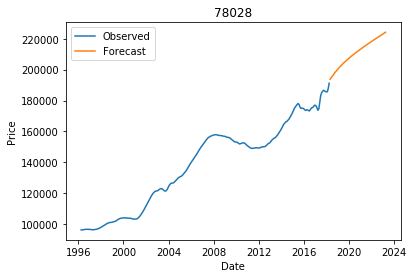

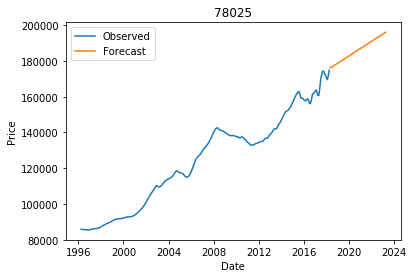

In [39]:
view_5_year_forecast(kerr_data, kerr_best_models, kerr_zip_codes)

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app


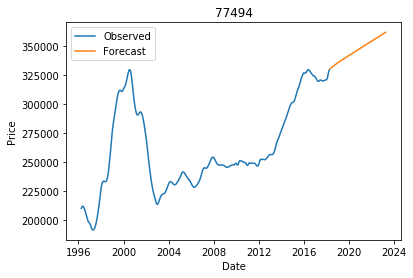

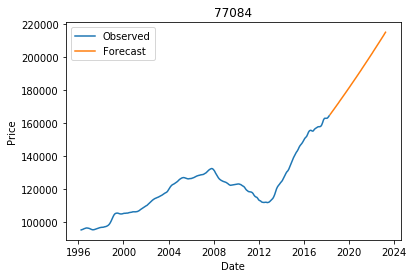

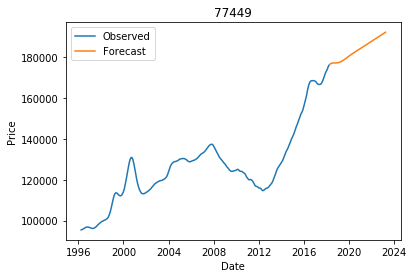

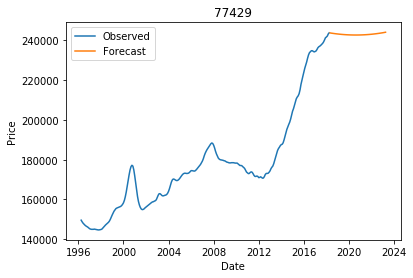

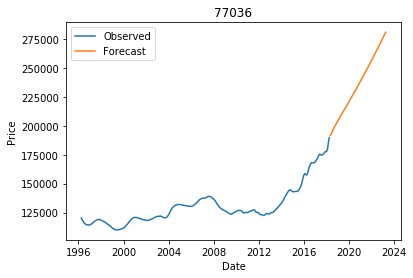

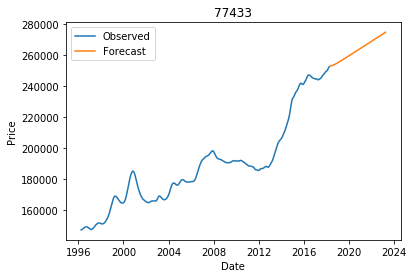

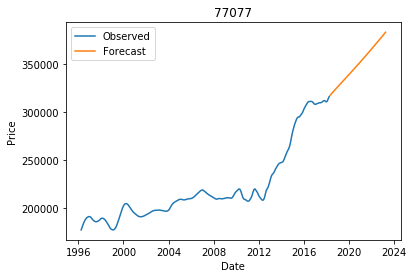

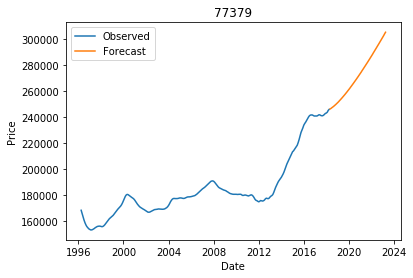

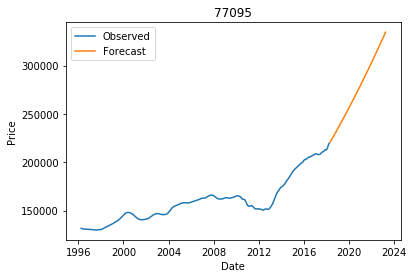

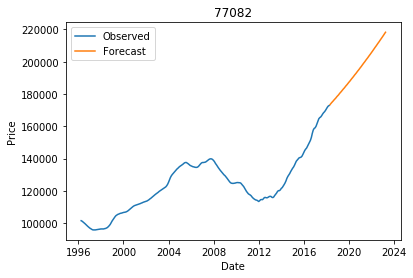

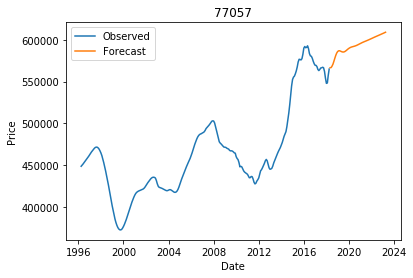

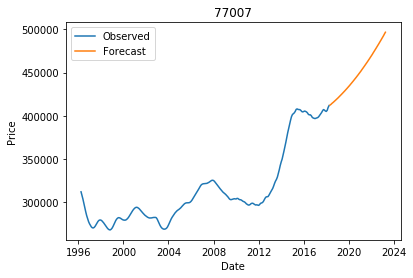

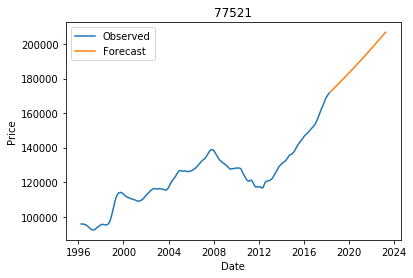

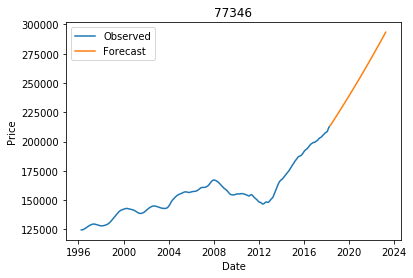

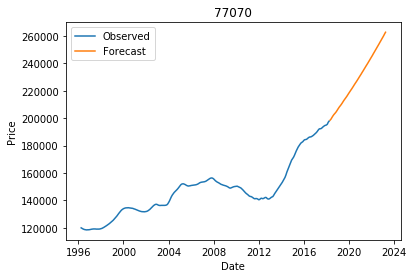

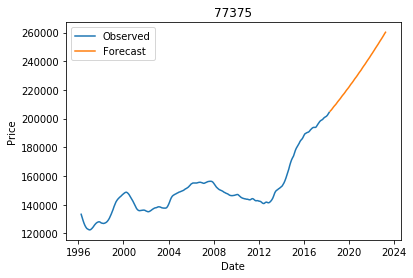

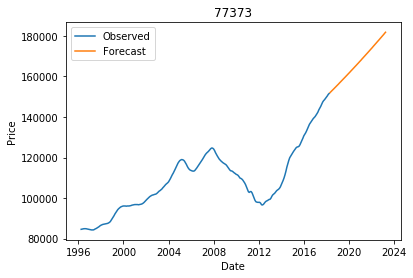

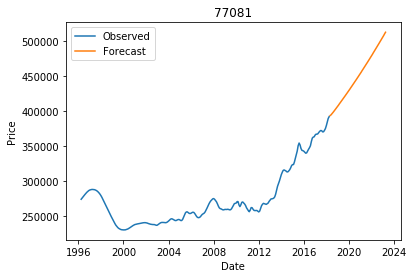

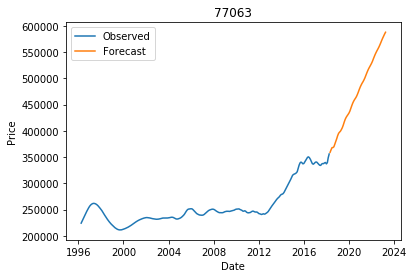

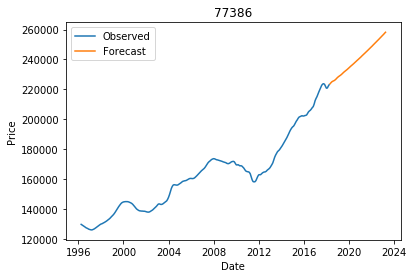

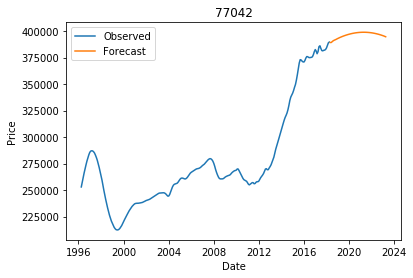

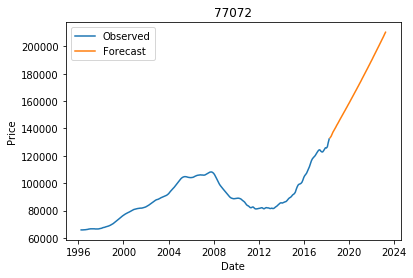

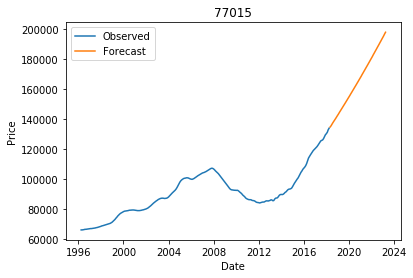

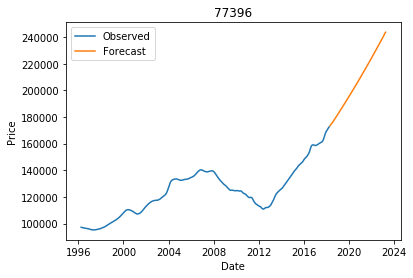

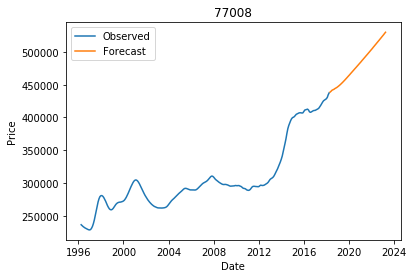

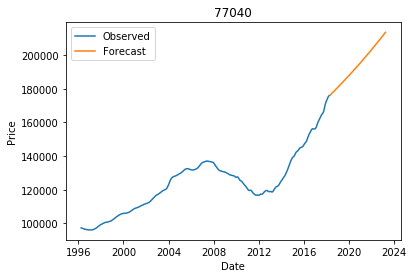

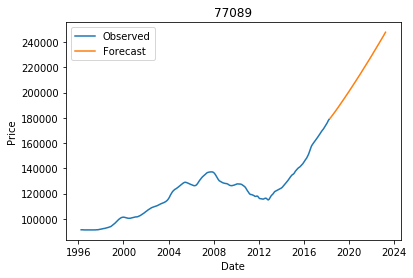

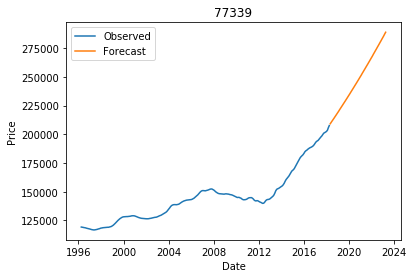

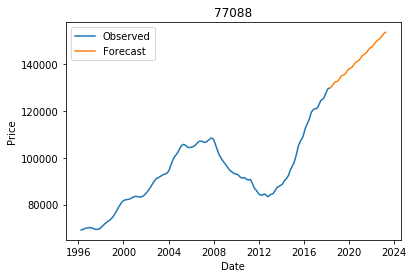

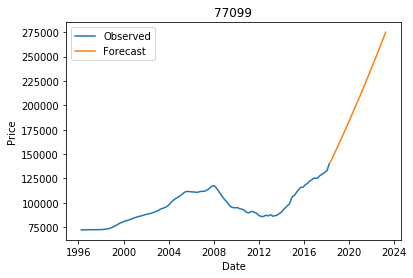

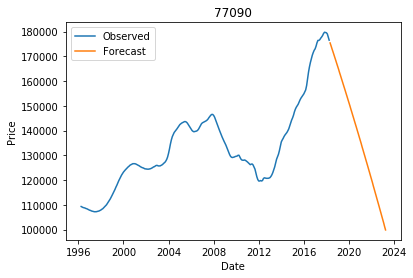

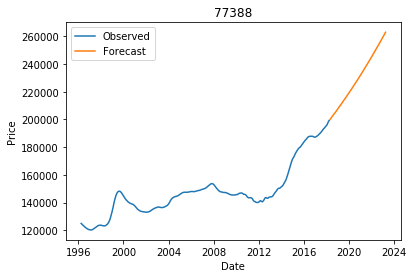

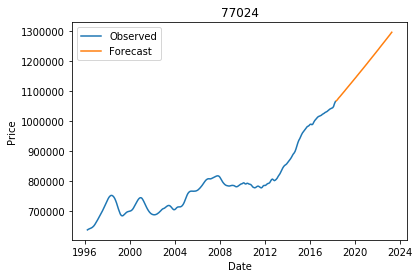

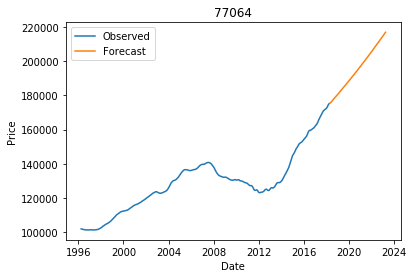

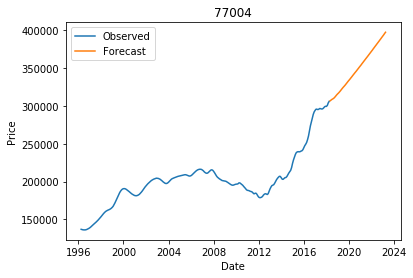

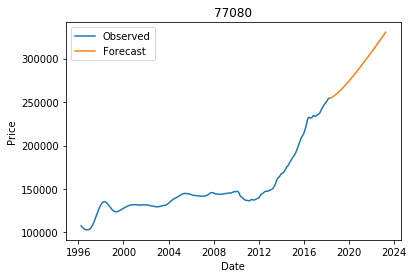

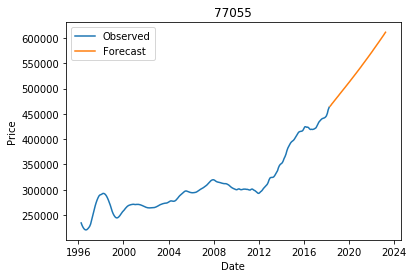

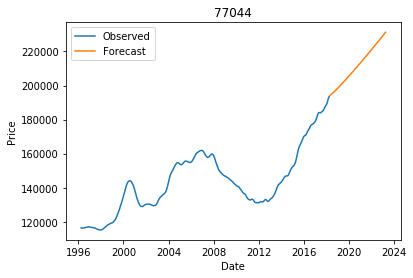

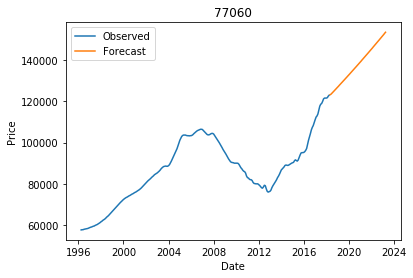

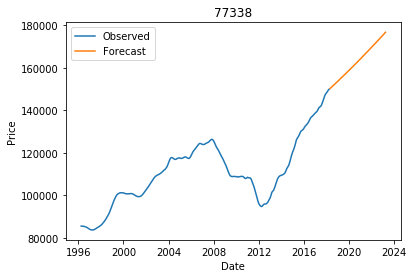

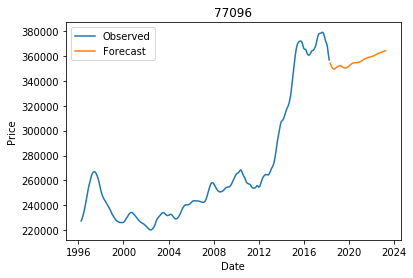

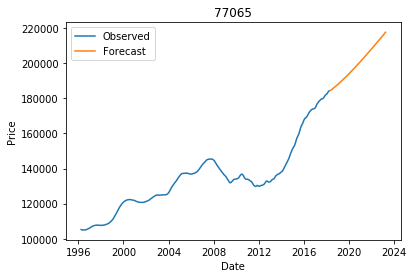

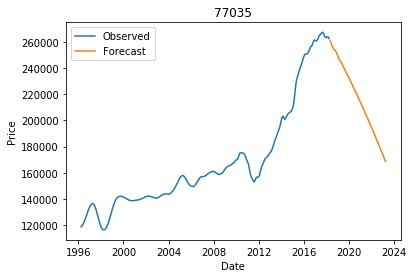

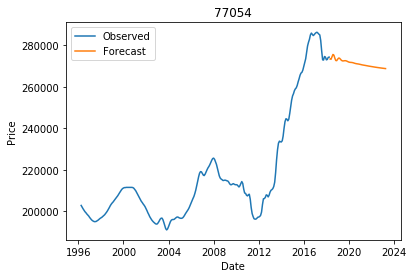

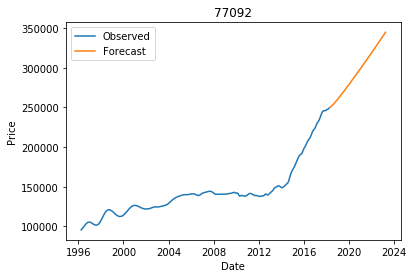

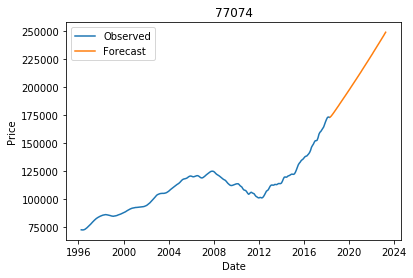

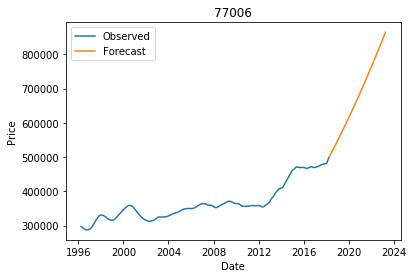

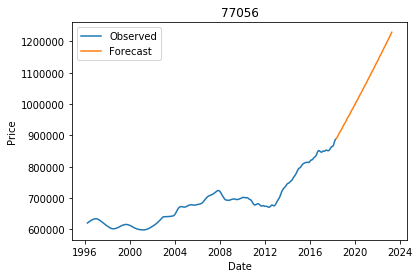

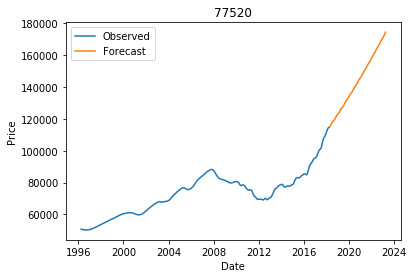

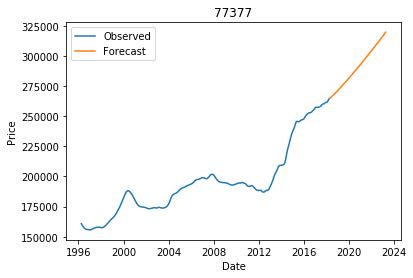

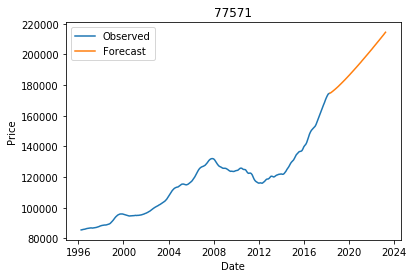

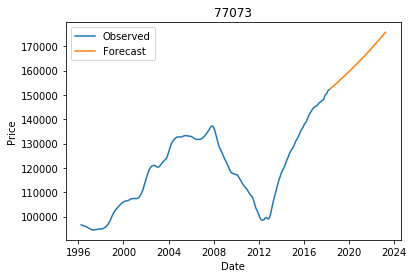

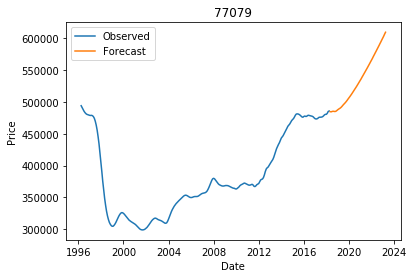

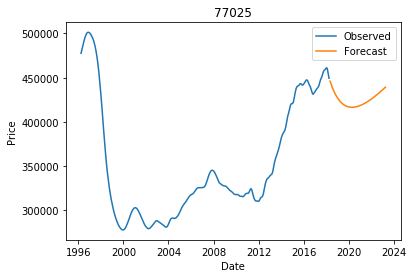

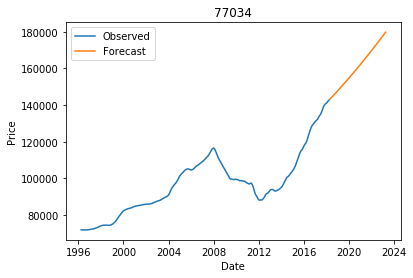

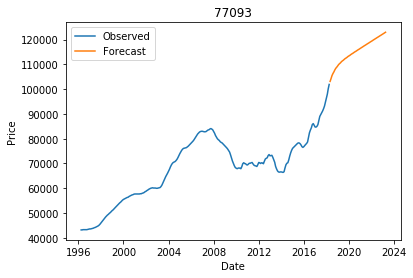

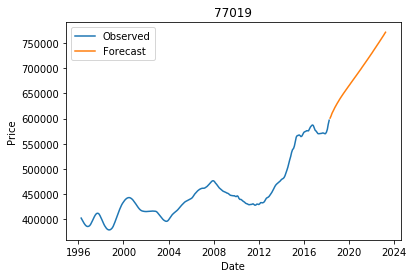

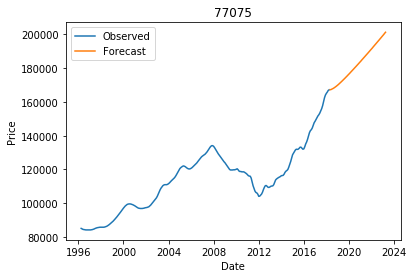

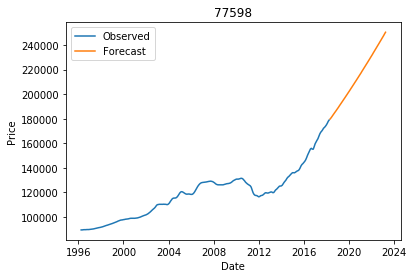

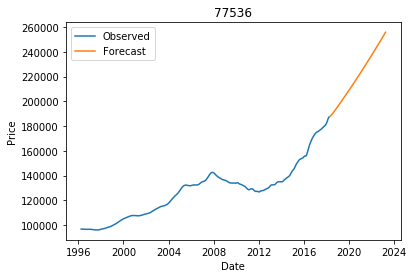

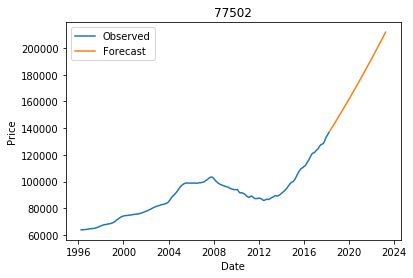

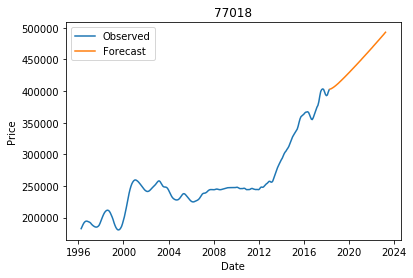

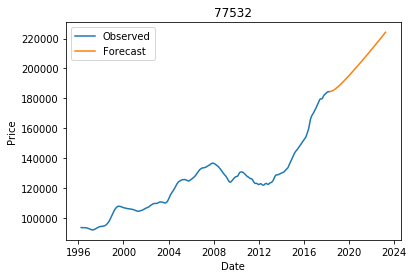

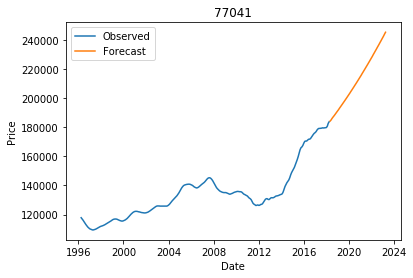

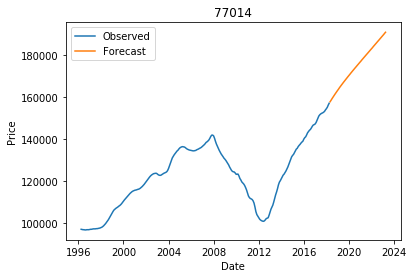

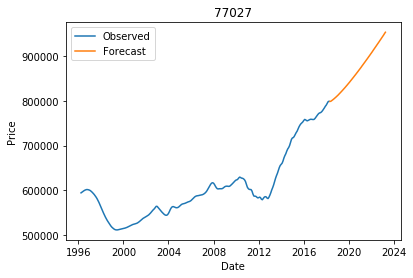

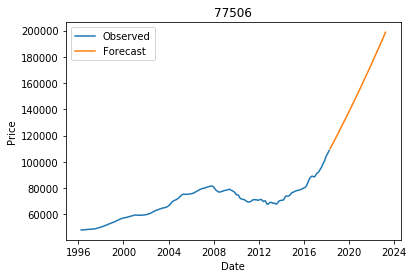

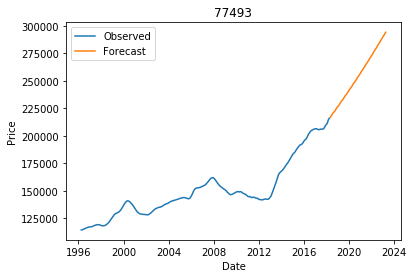

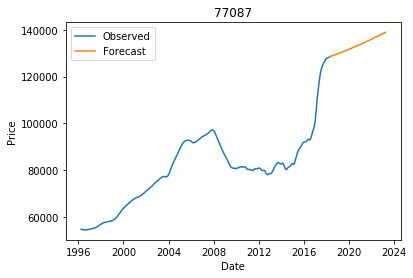

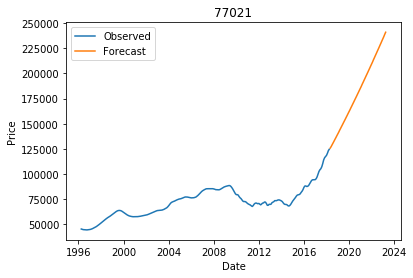

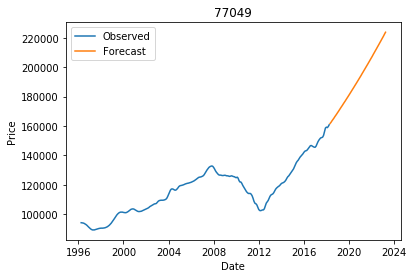

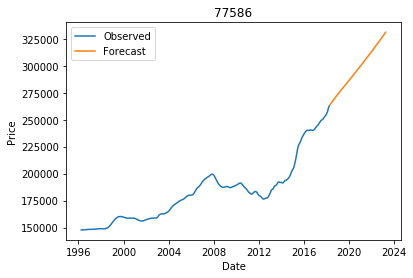

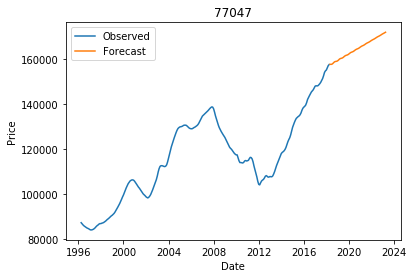

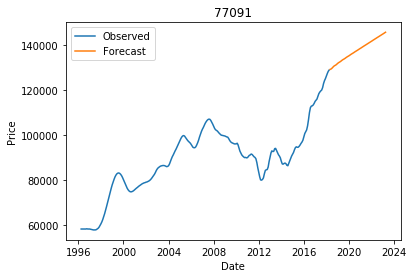

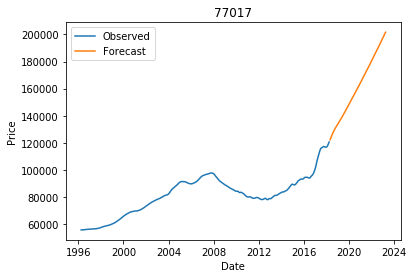

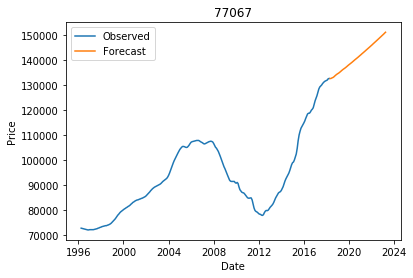

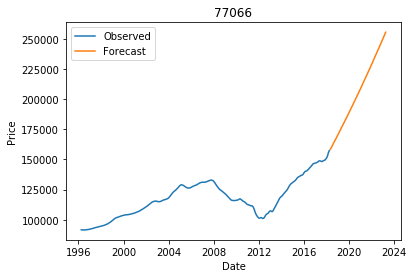

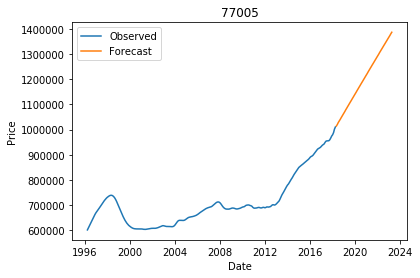

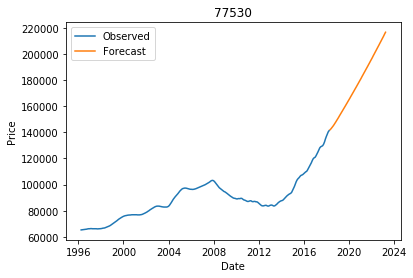

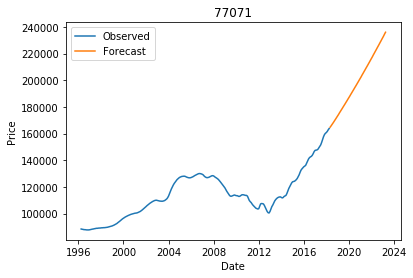

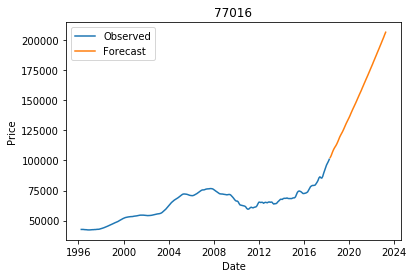

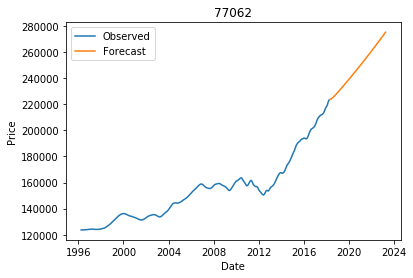

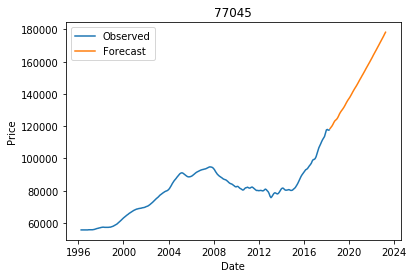

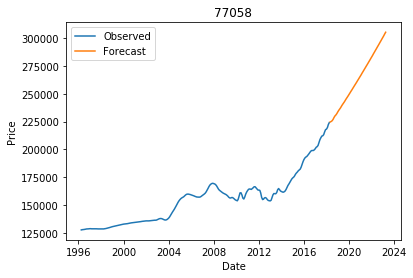

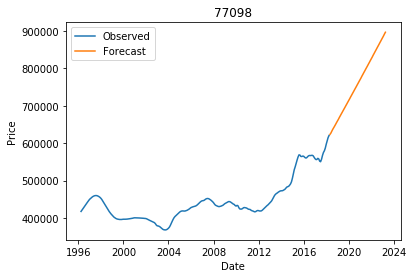

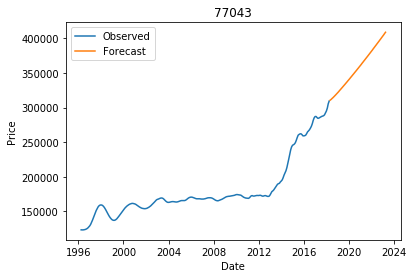

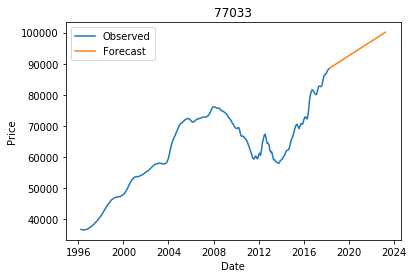

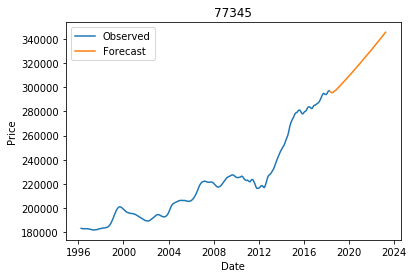

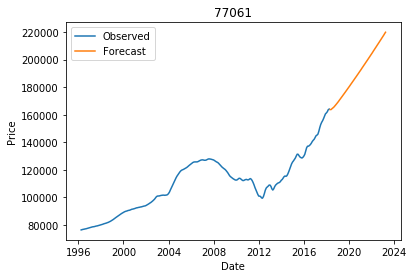

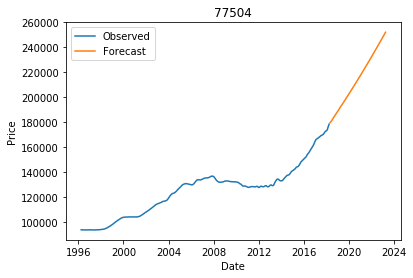

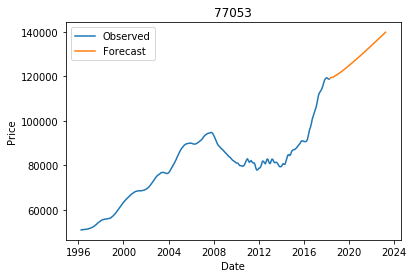

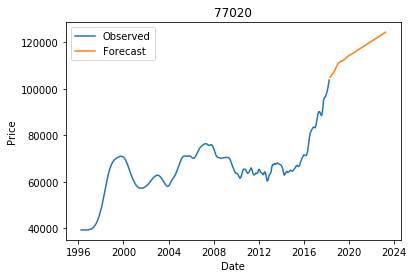

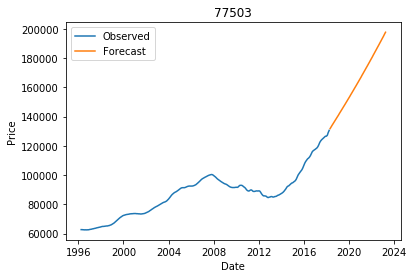

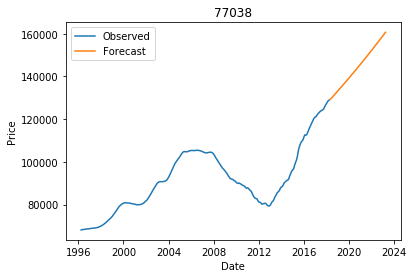

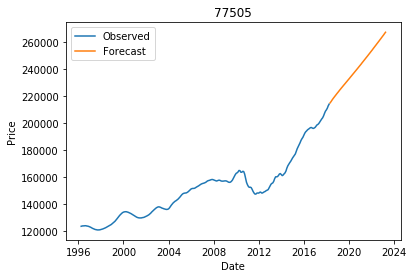

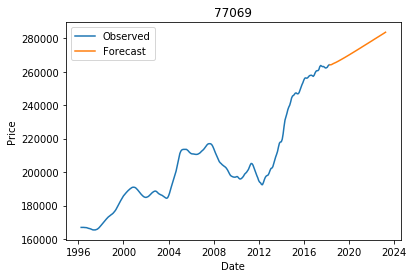

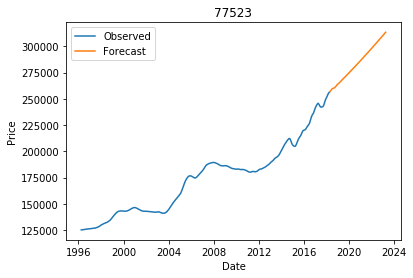

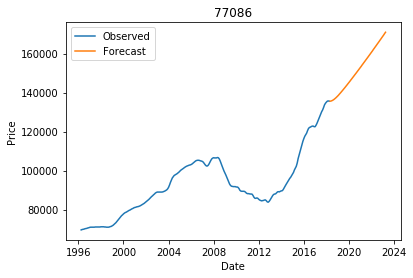

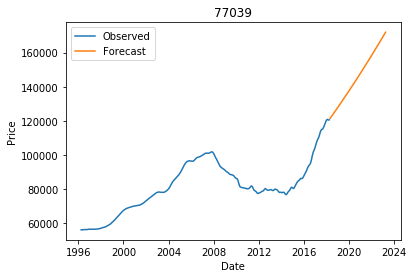

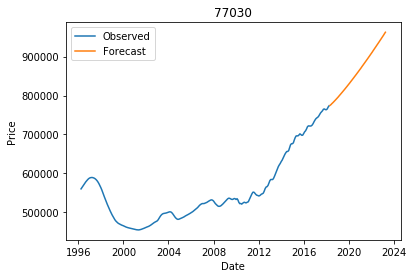

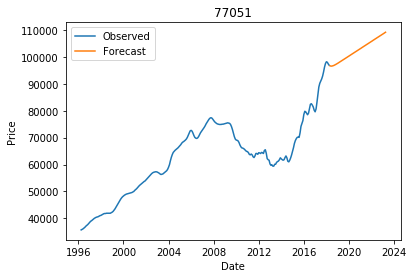

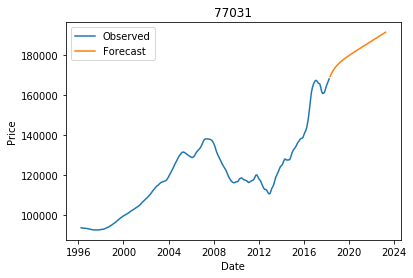

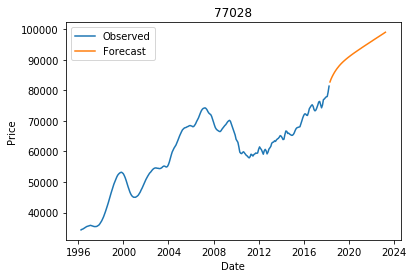

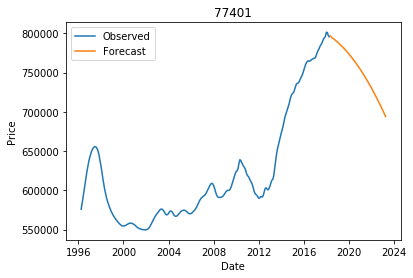

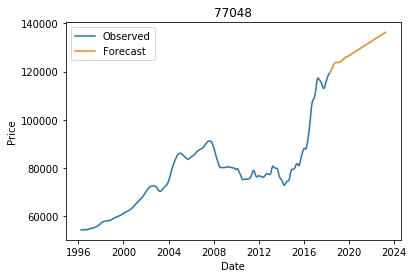

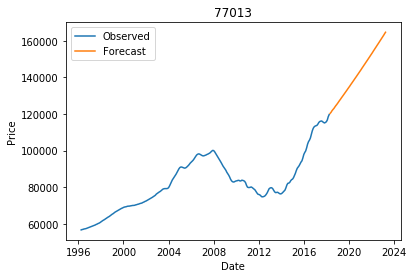

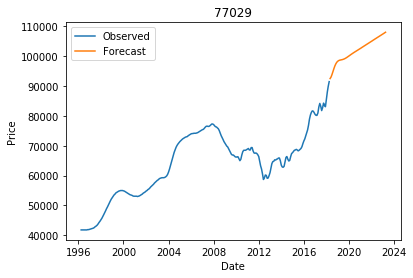

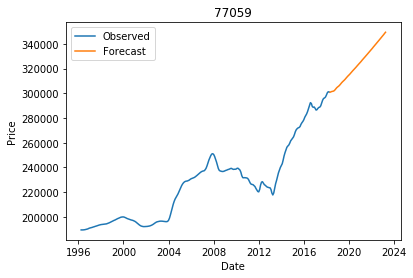

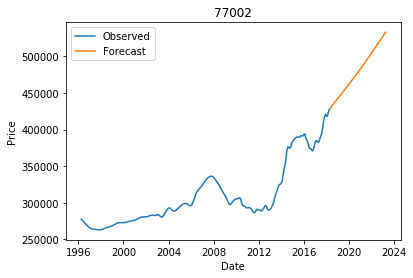

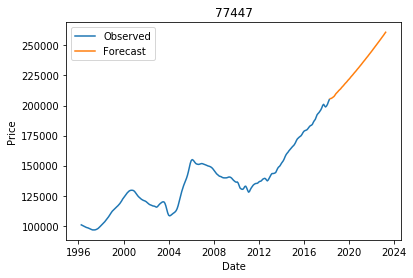

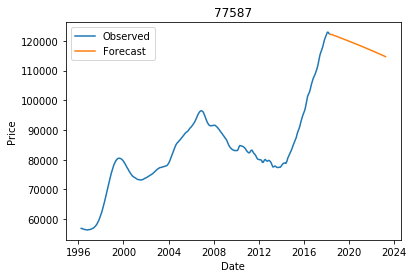

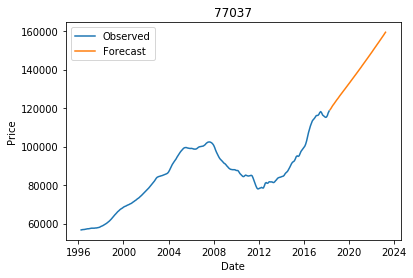

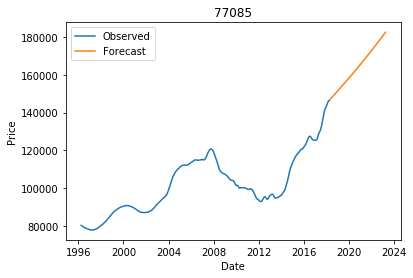

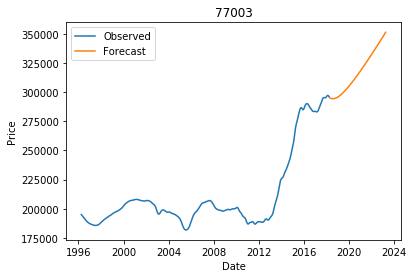

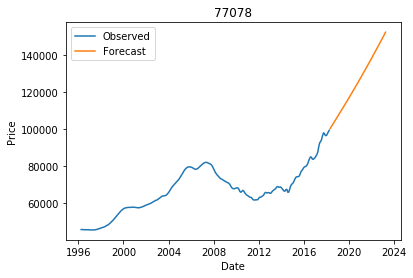

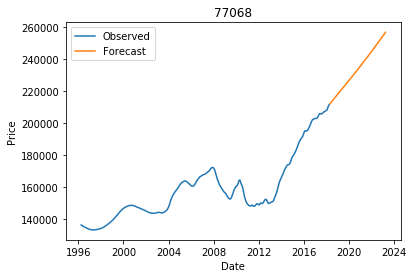

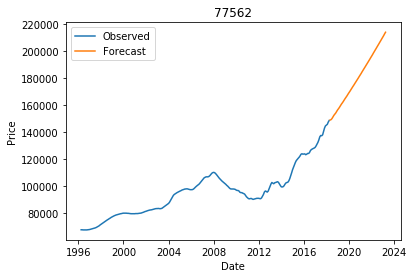

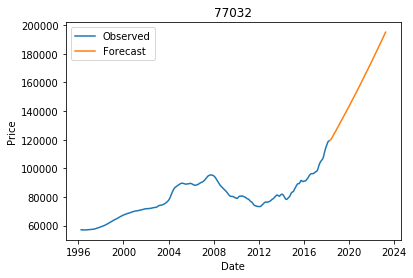

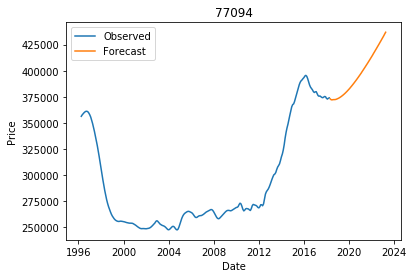

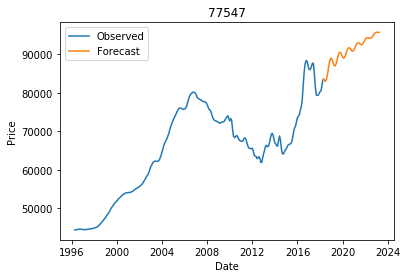

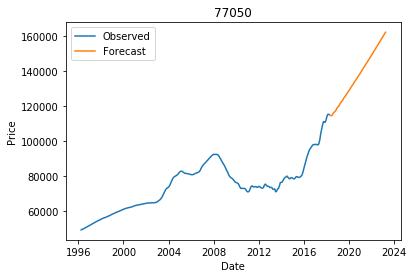

In [40]:
view_5_year_forecast(harris_data, harris_best_models, harris_zip_codes)

In [43]:
last_date = pd.Timestamp(kerr_data[0].tail(1).index[0])
last_date
# add five years
five_years = []
next_date = (last_date + pd.offsets.MonthBegin())
print(next_date)
five_years.append(next_date)
for x in range(1, 60):
    next_date = (next_date + pd.offsets.MonthBegin())
    five_years.append(next_date)
five_years

2018-05-01 00:00:00


[Timestamp('2018-05-01 00:00:00'),
 Timestamp('2018-06-01 00:00:00'),
 Timestamp('2018-07-01 00:00:00'),
 Timestamp('2018-08-01 00:00:00'),
 Timestamp('2018-09-01 00:00:00'),
 Timestamp('2018-10-01 00:00:00'),
 Timestamp('2018-11-01 00:00:00'),
 Timestamp('2018-12-01 00:00:00'),
 Timestamp('2019-01-01 00:00:00'),
 Timestamp('2019-02-01 00:00:00'),
 Timestamp('2019-03-01 00:00:00'),
 Timestamp('2019-04-01 00:00:00'),
 Timestamp('2019-05-01 00:00:00'),
 Timestamp('2019-06-01 00:00:00'),
 Timestamp('2019-07-01 00:00:00'),
 Timestamp('2019-08-01 00:00:00'),
 Timestamp('2019-09-01 00:00:00'),
 Timestamp('2019-10-01 00:00:00'),
 Timestamp('2019-11-01 00:00:00'),
 Timestamp('2019-12-01 00:00:00'),
 Timestamp('2020-01-01 00:00:00'),
 Timestamp('2020-02-01 00:00:00'),
 Timestamp('2020-03-01 00:00:00'),
 Timestamp('2020-04-01 00:00:00'),
 Timestamp('2020-05-01 00:00:00'),
 Timestamp('2020-06-01 00:00:00'),
 Timestamp('2020-07-01 00:00:00'),
 Timestamp('2020-08-01 00:00:00'),
 Timestamp('2020-09-

In [50]:
data = kerr_best_models[0]['forecast'][0]
df = pd.DataFrame()
df['Price'] = data
df.index = five_years

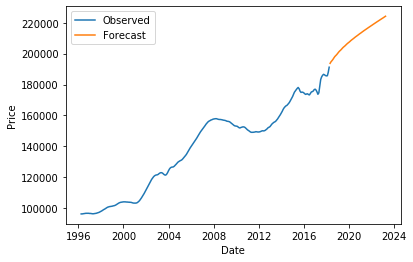

In [51]:
ax = plt.plot(kerr_data[0], label='Observed')

# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='k', alpha=.2)

ax = plt.plot(df, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend();

In [52]:
def acf_pacf_for_data(data):
    from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
    plot_acf(data); plt.xlim(0,25); plt.show()
    plot_pacf(data); plt.xlim(0,25); plt.ylim(-1,1);plt.show()

TypeError: ufunc 'multiply' output (typecode 'O') could not be coerced to provided output parameter (typecode 'd') according to the casting rule ''same_kind''

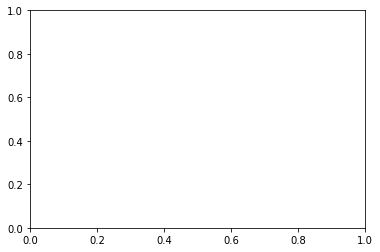

In [53]:
for i in kerr_data:
    acf_pacf_for_data(i['Price'])

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
start = time.time()
plot_acf(kendall_county_boerne); plt.xlim(0,25); plt.show()
plot_pacf(kendall_county_boerne); plt.xlim(0,25); plt.ylim(-1,1);plt.show()
# print('Took', time.time()-start, 'seconds.')

Data is already random walk

In [ ]:
print('Base ARIMA RMSE:', sqrt(mean_squared_error(kendall_county_boerne['value'][-test_period:], arima_forecast)))
print('Regression RMSE:', sqrt(mean_squared_error(kendall_county_boerne['value'][-test_period:], forecast_df['value'][-test_period:])))

In [ ]:
## Add year and month features
import numpy as np

start = time.time()
kendall_county_boerne['Year'] = kendall_county_boerne.index.year - np.min(kendall_county_boerne.index.year)
kendall_county_boerne['Month'] = kendall_county_boerne.index.month
date_features = ['Year', 'Month']
## Add polynomials of datetime components
polynomial_terms = [2,3]
for feature in date_features:
    for i in polynomial_terms:
        kendall_county_boerne[feature+'**'+str(i)] = kendall_county_boerne[feature]**i
## Add previous values and polynomial terms of previous values
previous_values_range = 10*12
for i in range(1,previous_values_range):
    kendall_county_boerne['Previous'+str(i)] = kendall_county_boerne['value'].shift(i).bfill()
    for j in polynomial_terms:
        kendall_county_boerne['Previous'+str(i)+'**'+str(j)] = (kendall_county_boerne['value'].shift(i).bfill())**j
kendall_county_boerne.head()
# print('Took', time.time()-start, 'seconds.')

In [ ]:
## fit lasso regression
start = time.time()
from sklearn.linear_model import LassoLarsCV #lowest angle regression #cv cross validation
reg = LassoLarsCV(cv=10).fit(kendall_county_boerne.drop('value',axis=1)[:-test_period], kendall_county_boerne['value'][:-test_period])
# print('Took', time.time()-start, 'seconds.')

In [ ]:
## view features selected
start = time.time()
selected_features = pd.DataFrame()
selected_features['Feature'] = kendall_county_boerne.drop('value',axis=1).columns[reg.coef_>0]
selected_features['Coefficient'] = reg.coef_[reg.coef_>0]
selected_features
# print('Took', time.time()-start, 'seconds.')

In [ ]:
# check out offsets library for additional features

In [ ]:
## create and populate forecast dataframe
start = time.time()
forecast_df = kendall_county_boerne.copy()
for datetime, date in zip(kendall_county_boerne.index[-test_period:], range(len(kendall_county_boerne)-test_period, len(kendall_county_boerne))):
    values = []
    ## add datetime components
    values.append(datetime.year - np.min(kendall_county_boerne.index.year))
    values.append(datetime.month)
    ## add polynomial terms of datetime components
    for feature in date_features:
        for i in polynomial_terms:
            values.append((forecast_df[feature][date])**i)
    ## add previous values and polynomial terms of previous values
    for i in range(1,previous_values_range):
        values.append(forecast_df['value'][date-i])
        for j in polynomial_terms:
            values.append((forecast_df['value'][date-i])**j)
    ## make prediction on current datetime
    forecast = reg.predict(np.array(values).reshape(1,-1))
    ## append prediction to start of values array
    values.insert(0, forecast[0])
    ## set forecast row in dataframe
    forecast_df.loc[datetime] = values
# print('Took', time.time()-start, 'seconds.')

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
start = time.time()
print('ARIMA RMSE:', sqrt(mean_squared_error(kendall_county_boerne['value'][-test_period:], arima_forecast)))
print('Regression RMSE:', sqrt(mean_squared_error(kendall_county_boerne['value'][-test_period:], forecast_df['value'][-test_period:])))
# print('Took', time.time()-start, 'seconds.')

In [ ]:
plt.plot(kendall_county_boerne.index[-test_period:], kendall_county_boerne['value'][-test_period:])
plt.plot(kendall_county_boerne.index[-test_period:], arima_forecast)
plt.title('ARIMA Forecast')
plt.legend(['Actual', 'ARIMA'])

In [ ]:
plt.plot(kendall_county_boerne.index[-test_period:], kendall_county_boerne['value'][-test_period:])
plt.plot(kendall_county_boerne.index[-test_period:], forecast_df['value'][-test_period:])
plt.title('Regression Forecast')
plt.legend(['Actual', 'Regression'])

In [ ]:
plt.plot(kendall_county_boerne.index[:-2], model.resid())
plt.title('ARIMA Residuals')

# Step 2: Data Preprocessing

In [ ]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

# Step 3: EDA and Visualization

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

# Step 4: Reshape from Wide to Long Format

In [ ]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

# Step 5: ARIMA Modeling

# Step 6: Interpreting Results

In [ ]:
# write function that will ask user to input state then county then run model on selected criteria

In [ ]:
# References
# https://stackoverflow.com/questions/51734180/converting-statsmodels-summary-object-to-pandas-dataframe
# https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3